# Telecom Churn Case Study


- Mandheer Singh

Goal- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.


The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :
The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# Loading and understanding data

In [1]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.set_option("max_rows", None)
sns.set(style='whitegrid')

In [3]:
telecom=pd.read_csv('telecom_churn_data.csv',encoding = "ISO-8859-1")

In [4]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
telecom.shape

(99999, 226)

In [6]:
telecom.to_csv('telecom.csv',index=False)

In [7]:
telecom.mobile_number.nunique()

99999

In [8]:
telecom.isnull().sum(axis=0)

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [9]:
telecom.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [10]:
#dropping all columns of date customers
date_col=list(telecom.loc[:, telecom.columns.str.contains('date')].columns)
telecom.drop(date_col,axis=1,inplace=True)

In [11]:
#glancing data and encoding of column names
telecom.loc[:, telecom.columns.str.startswith('loc')].head(5)

loc_og_t2o_mou  loc_ic_t2o_mou  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0             0.0             0.0               NaN               NaN   
1             0.0             0.0             23.88             74.56   
2             0.0             0.0              7.19             28.74   
3             0.0             0.0             73.68             34.81   
4             0.0             0.0             50.31            149.44   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00               NaN               NaN               NaN   
1              7.68             18.34             11.51             75.94   
2             13.58             14.39             29.34             16.86   
3             10.61             15.49            107.43             83.21   
4             83.89             58.78             67.64             91.88   

   loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00               NaN               NaN               NaN   
1            291.86             53.76              0.00              0.00   
2             38.46             28.16             24.11             21.79   
3             22.46             65.46              1.91              0.65   
4            124.26             37.89              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0              0.00               NaN               NaN               NaN   
1              0.00              0.00               0.0              2.91   
2             15.61             22.24               0.0            135.54   
3              4.91              2.06               0.0              0.00   
4              0.00              1.93               0.0              0.00   

   loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0              0.00               NaN           NaN           NaN   
1              0.00              0.00         35.39        150.51   
2             45.76              0.48         60.66         67.41   
3              0.00              0.00        183.03        118.68   
4              0.00              0.00        117.96        241.33   

   loc_og_mou_8  loc_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
0          0.00           NaN               NaN               NaN   
1        299.54         72.11              1.61             29.91   
2         67.66         64.81            115.69             71.11   
3         37.99         83.03             62.08             19.98   
4        208.16         98.61            105.68             88.49   

   loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
0              0.16               NaN               NaN               NaN   
1             29.23            116.09             17.48             65.38   
2             67.46            148.23             14.38             15.44   
3              8.04             41.73            113.96             64.51   
4            233.81            154.56            106.84            109.54   

   loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0              4.13               NaN               NaN               NaN   
1            375.58             56.93              0.00              8.93   
2             38.89             38.98             99.48            122.29   
3             20.28             52.86             57.43             27.09   
4            104.13             48.24              1.50              0.00   

   loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  \
0              1.15               NaN           NaN           NaN   
1              3.61              0.00         19.09        104.23   
2             49.63            158.19        229.56        208.86   
3             19.84             65.59        233.48        111.59   
4              0.00              0.00        214.03        198.04   

   l

Column encoding could be like following:
  loc_og_t2t_mou:  Local outgoing call minute of usage from mobile to mobile within network(same telecom provider)

In [12]:
# renaming some of the columns to our encoding schemes
telecom.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 
                        'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8',
                        'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [13]:
# columns which have only single value
col_to_drop=telecom.loc[:,telecom.apply(pd.Series.nunique) == 1]
col_to_drop.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0        109             0.0             0.0             0.0   
1        109             0.0             0.0             0.0   
2        109             0.0             0.0             0.0   
3        109             0.0             0.0             0.0   
4        109             0.0             0.0             0.0   

   std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  \
0               NaN               NaN               0.0               NaN   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  
0               NaN               NaN               0.0               NaN  
1               0.0               0.0               0.0               0.0  
2               0.0               0.0               0.0               0.0  
3               0.0               0.0               0.0               0.0  
4               0.0               0.0               0.0               0.0

In [14]:
# dropping those columns having a single value
telecom.drop(list(col_to_drop.columns),axis=1,inplace=True)

In [15]:
telecom.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 202 columns):
 #   Column              Dtype  
---  ------              -----  
 0   mobile_number       int64  
 1   arpu_6              float64
 2   arpu_7              float64
 3   arpu_8              float64
 4   arpu_9              float64
 5   onnet_mou_6         float64
 6   onnet_mou_7         float64
 7   onnet_mou_8         float64
 8   onnet_mou_9         float64
 9   offnet_mou_6        float64
 10  offnet_mou_7        float64
 11  offnet_mou_8        float64
 12  offnet_mou_9        float64
 13  roam_ic_mou_6       float64
 14  roam_ic_mou_7       float64
 15  roam_ic_mou_8       float64
 16  roam_ic_mou_9       float64
 17  roam_og_mou_6       float64
 18  roam_og_mou_7       float64
 19  roam_og_mou_8       float64
 20  roam_og_mou_9       float64
 21  loc_og_t2t_mou_6    float64
 22  loc_og_t2t_mou_7    float64
 23  loc_og_t2t_mou_8    float64
 24  loc_og_t2t_mou_9    float64

There are no categorical variables left

In [16]:
telecom.loc[:,telecom.apply(pd.Series.nunique) == 2].head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  \
0               0.0               0.0               0.0               NaN   
1               NaN               0.0               0.0               NaN   
2               NaN               NaN               NaN               0.0   
3               NaN               NaN               NaN               NaN   
4               0.0               NaN               NaN               NaN   

   fb_user_6  fb_user_7  fb_user_8  fb_user_9  
0        1.0        1.0        1.0        NaN  
1        NaN        1.0        1.0        NaN  
2        NaN        NaN        NaN        1.0  
3        NaN        NaN        NaN        NaN  
4        0.0        NaN        NaN        NaN

# Missing value handling

In [17]:
#columnwise missing value percentage
round(100*telecom.isnull().sum(axis=0)/len(telecom.index),2)

mobile_number          0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8    

We can see that there are alot of columns where more than 70% values are missing Lets check whether we can drop them or not or can we simply impute with zero.
We can observe here that most of such columns are related to data packs or internet usage

In [18]:
telecom['total_rech_data_6'].value_counts()

1.0     13309
2.0      5186
3.0      2065
4.0      1335
5.0       808
6.0       588
7.0       428
8.0       341
9.0       261
10.0      219
11.0      161
12.0      136
14.0       63
13.0       59
15.0       32
17.0       30
16.0       28
18.0       20
19.0       15
20.0       14
22.0       13
21.0        6
24.0        6
25.0        4
23.0        4
32.0        3
40.0        3
26.0        3
28.0        3
29.0        2
35.0        2
34.0        1
33.0        1
27.0        1
61.0        1
55.0        1
46.0        1
Name: total_rech_data_6, dtype: int64

We can see here that if total recharge for data is null all related feilds are also null so we can impute it with 0. so we impute total_rech_data and max_rech_data  and avg_rech_amt_data with zero.

In [19]:
telecom['total_rech_data_6']=telecom['total_rech_data_6'].fillna(0)
telecom['total_rech_data_7']=telecom['total_rech_data_7'].fillna(0)
telecom['total_rech_data_8']=telecom['total_rech_data_8'].fillna(0)
telecom['total_rech_data_9']=telecom['total_rech_data_9'].fillna(0)
telecom['max_rech_data_6']=telecom['max_rech_data_6'].fillna(0)
telecom['max_rech_data_7']=telecom['max_rech_data_7'].fillna(0)
telecom['max_rech_data_8']=telecom['max_rech_data_8'].fillna(0)
telecom['max_rech_data_9']=telecom['max_rech_data_9'].fillna(0)
telecom['av_rech_amt_data_6']=telecom['av_rech_amt_data_6'].fillna(0)
telecom['av_rech_amt_data_7']=telecom['av_rech_amt_data_7'].fillna(0)
telecom['av_rech_amt_data_8']=telecom['av_rech_amt_data_8'].fillna(0)
telecom['av_rech_amt_data_9']=telecom['av_rech_amt_data_9'].fillna(0)


In [20]:
#dropping some columns due to high missing values
to_drop=['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
        'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9','night_pck_user_6',
         'night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9'
        ]
telecom.drop(to_drop,axis=1,inplace=True)

In [21]:
telecom[['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9']].head(10)

arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  arpu_3g_6  arpu_3g_7  \
0     212.17     212.17     212.17        NaN     212.17     212.17   
1        NaN      28.61       7.60        NaN        NaN       0.00   
2        NaN        NaN        NaN        0.0        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4       0.00        NaN        NaN        NaN       0.00        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   
6        NaN        NaN        NaN        NaN        NaN        NaN   
7        NaN        NaN        NaN        NaN        NaN        NaN   
8        NaN       0.00       0.00        NaN        NaN       0.00   
9        NaN       0.00        NaN        NaN        NaN       0.00   

   arpu_3g_8  arpu_3g_9  
0     212.17        NaN  
1       0.00        NaN  
2        NaN       2.84  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN        NaN  
7        NaN        NaN  
8      19.83        NaN  
9        NaN        NaN

we can impute it with zero

In [22]:
telecom['arpu_2g_6']=telecom['arpu_2g_6'].fillna(0)
telecom['arpu_2g_7']=telecom['arpu_2g_7'].fillna(0)
telecom['arpu_2g_8']=telecom['arpu_2g_8'].fillna(0)
telecom['arpu_2g_9']=telecom['arpu_2g_9'].fillna(0)
telecom['arpu_3g_6']=telecom['arpu_3g_6'].fillna(0)
telecom['arpu_3g_7']=telecom['arpu_3g_7'].fillna(0)
telecom['arpu_3g_8']=telecom['arpu_3g_8'].fillna(0)
telecom['arpu_3g_9']=telecom['arpu_3g_9'].fillna(0)


In [23]:
#columnwise missing value percentage
round(100*telecom.isnull().sum(axis=0)/len(telecom.index),2)

mobile_number         0.00
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           3.94
onnet_mou_7           3.86
onnet_mou_8           5.38
onnet_mou_9           7.75
offnet_mou_6          3.94
offnet_mou_7          3.86
offnet_mou_8          5.38
offnet_mou_9          7.75
roam_ic_mou_6         3.94
roam_ic_mou_7         3.86
roam_ic_mou_8         5.38
roam_ic_mou_9         7.75
roam_og_mou_6         3.94
roam_og_mou_7         3.86
roam_og_mou_8         5.38
roam_og_mou_9         7.75
loc_og_t2t_mou_6      3.94
loc_og_t2t_mou_7      3.86
loc_og_t2t_mou_8      5.38
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_6      3.94
loc_og_t2m_mou_7      3.86
loc_og_t2m_mou_8      5.38
loc_og_t2m_mou_9      7.75
loc_og_t2f_mou_6      3.94
loc_og_t2f_mou_7      3.86
loc_og_t2f_mou_8      5.38
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_6      3.94
loc_og_t2c_mou_7      3.86
loc_og_t2c_mou_8      5.38
loc_og_t2c_mou_9      7.75
l

<AxesSubplot:xlabel='offnet_mou_6', ylabel='Density'>

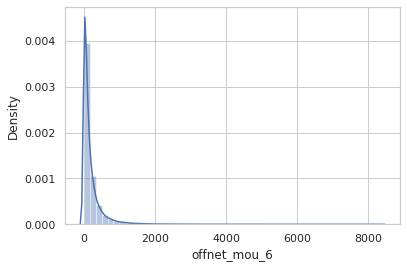

In [24]:
sns.distplot(telecom['offnet_mou_6'])


<AxesSubplot:xlabel='loc_og_t2t_mou_6', ylabel='Density'>

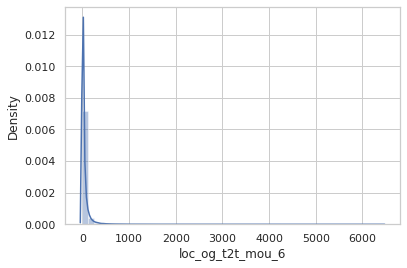

In [25]:
sns.distplot(telecom['loc_og_t2t_mou_6'])

In [26]:
telecom[['offnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9']].median()

offnet_mou_6    96.31
onnet_mou_7     32.33
onnet_mou_8     32.36
onnet_mou_9     29.84
dtype: float64

In [27]:
telecom['roam_ic_mou_6'].median()

0.0

We can impute these columns using KNNImputer or medianof the  respective columns

In [28]:
#imputing all left columns with the median
for i in telecom.columns:
    if telecom[i].isnull().sum()>10:
        med=telecom[i].median()
        telecom[i]=telecom[i].fillna(med)
        

In [29]:
#columnwise missing value percentage
round(100*telecom.isnull().sum(axis=0)/len(telecom.index),2)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

We have successfully imputed the missing values

In [30]:
telecom.shape

(99999, 186)

# Filtering high value customers

As per the description Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [31]:
telecom.loc[:, telecom.columns.str.endswith('_6')].head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_og_mou_6  \
0  197.385        34.31         96.31            0.0            0.0   
1   34.047        24.11         15.74            0.0            0.0   
2  167.690        11.54        143.33            0.0            0.0   
3  221.338        99.91        123.31            0.0            0.0   
4  261.636        50.31         76.96            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0             11.91             41.03              0.00               0.0   
1             23.88             11.51              0.00               0.0   
2              7.19             29.34             24.11               0.0   
3             73.68            107.43              1.91               0.0   
4             50.31             67.64              0.00               0.0   

   loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
0         65.11              0.00              3.95              0.00   
1         35.39              0.23              0.00              0.00   
2         60.66              4.34             41.81              1.48   
3        183.03             26.23              2.99              0.00   
4        117.96              0.00              9.31              0.00   

   std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
0         11.64           0.0          0.00         0.00            0.00   
1          0.23           0.0          4.68         0.00           40.31   
2         47.64           0.0         46.56         0.45          155.33   
3         29.23           0.0         10.96         0.00          223.23   
4          9.31           0.0          0.00         0.00          127.28   

   loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6  \
0             15.69             56.49              0.88         92.16   
1              1.61             17.48              0.00         19.09   
2            115.69             14.38             99.48        229.56   
3             62.08            113.96             57.43        233.48   
4            105.68            106.84              1.50        214.03   

   std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6  \
0              0.00              2.03              0.00          5.89   
1              0.00              5.90              0.00          5.90   
2             72.41             45.18             21.73        139.33   
3             43.48              1.33              1.18         45.99   
4              0.00              1.93              0.00          1.93   

   total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_rech_num_6  \
0            0.00          0.00          0.00         0.00                 4   
1           26.83          0.00          1.83         0.00                 4   
2          370.04          0.21          0.00         0.93                 5   
3          280.08          0.59          0.00         0.00                10   
4          216.44          0.00          0.00         0.48                 5   

   total_rech_amt_6  max_rech_amt_6  last_day_rch_amt_6  total_rech_data_6  \
0               362             252                 252                1.0   
1                74              44                  44                0.0   
2               168              86                   0                0.0   
3               230              60                  30                0.0   
4               196              56                  50                1.0   

   max_rech_data_6  av_rech_amt_data_6  vol_2g_mb_6  vol_3g_mb_6  arpu_3g_6  \
0            252.0               252.0        30.13        83.57     212.17   
1              0.0                 0.0         0.00         0.00       0.00   
2              0.0                 0.0         0.00         0.00       0.00   
3              0.0                 0.0         0.00         0.00       0.0

In [32]:
# finding our X which is 70th percentile of the average recharge amount in the month 6 and 7
#taking deep dive to find some info that 
telecom[['total_rech_num_6','total_rech_amt_6','max_rech_amt_6','total_rech_data_6','max_rech_data_6','av_rech_amt_data_6']].tail(5)

total_rech_num_6  total_rech_amt_6  max_rech_amt_6  total_rech_data_6  \
99994                 2                60              60                0.0   
99995                 5               110             110                0.0   
99996                 5               119              50                2.0   
99997                 3               381             202                3.0   
99998                 5               710             175                1.0   

       max_rech_data_6  av_rech_amt_data_6  
99994              0.0                 0.0  
99995              0.0                 0.0  
99996             25.0                39.0  
99997            202.0               583.0  
99998            154.0               154.0

From the above data we can conclude that 
- There are two types of recharge normal and data
- For normal recharge total recharge amount is directly given
- For data recharges total amount is not given we have to calculate it which should be
     -- total_rech_data*av_rech_amt_data
- There may be missing values also

In [33]:
# Deriving new feature Total Recharge amount for data
telecom['total_rech_data_amt_6']=telecom['total_rech_data_6'].fillna(0)*telecom['av_rech_amt_data_6']
telecom['total_rech_data_amt_7']=telecom['total_rech_data_7'].fillna(0)*telecom['av_rech_amt_data_7']
telecom['total_rech_data_amt_8']=telecom['total_rech_data_8'].fillna(0)*telecom['av_rech_amt_data_8']
telecom['total_rech_data_amt_9']=telecom['total_rech_data_9'].fillna(0)*telecom['av_rech_amt_data_9']
#dropping original features
telecom.drop(['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7',
             'total_rech_data_8','av_rech_amt_data_8','total_rech_data_9','av_rech_amt_data_9'],axis=1,inplace=True)

In [34]:
#Now calculating average recharge amount for month 6 and 7
avg_rech_6_and_7=((telecom['total_rech_data_amt_6'].fillna(0)+telecom['total_rech_amt_6'].fillna(0))+
                    (telecom['total_rech_data_amt_7'].fillna(0)+telecom['total_rech_amt_7'].fillna(0)))/2.0
print(avg_rech_6_and_7)


0          559.000
1          306.000
2          241.500
3          270.000
4          301.000
5           60.000
6          360.500
7         1185.000
8          696.000
9          284.500
10           0.000
11         183.000
12         110.000
13         380.000
14          50.000
15         343.000
16         459.000
17         408.000
18          45.000
19         378.000
20         343.500
21         640.000
22         142.500
23         583.000
24         385.000
25         311.000
26         154.000
27          30.000
28          96.500
29          98.000
30          86.000
31         305.500
32         193.000
33       14786.500
34         241.000
35         200.500
36         125.000
37          25.000
38         528.000
39         308.000
40         252.000
41         503.000
42         161.000
43         210.000
44         398.000
45         125.000
46         161.000
47         342.000
48        1448.500
49          66.000
50         154.000
51         282.500
52         1

In [35]:
# 70th percentile of the average
x=np.percentile(avg_rech_6_and_7,70)
print(x)

478.0


In [36]:
#Filtering data based on x
telecom=telecom[avg_rech_6_and_7>=x]
telecom.shape

(30001, 182)

# Tagging churn

next we have to tag churn using 9th month data based on usage and then drop relevant columns

In [37]:
#customers who have no usage of incoming outgoing 2g or 3g data are the churners
df=telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
telecom['churn']=np.where(df.sum(axis=1)==0,1,0)
telecom['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [38]:
#dropping 9th month columns
telecom.drop(list(telecom.loc[:, telecom.columns.str.endswith('_9')].columns),axis=1,inplace=True)

In [39]:
telecom.shape

(30001, 138)

<AxesSubplot:xlabel='churn', ylabel='count'>

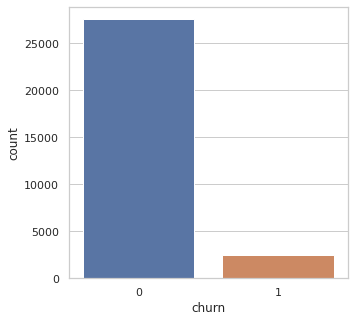

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(telecom['churn'])


In [41]:
#churn rate
print(round(100*telecom.loc[telecom['churn']==1,'churn'].count()/len(telecom.index),3))

8.136


Thus churn rate is 8.136 % for high value customers. We have to take care of the class imbalance during the model building

# Data Preparation

- Deriving new features
- EDA
- Outlier treatment
- Scaling

In [42]:
print(list(telecom.columns))

['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_i

In [43]:
telecom['aon_month']=telecom['aon']/30
telecom.drop('aon',axis=1,inplace=True)

We could merge the good phase data into 1 by taking average of 6th and 7th month data and can drop the original features

In [44]:
cols=telecom.filter(regex='_6|_7').columns.str[:-2]

In [45]:
for i in cols:
    telecom[i+'_67']=(telecom[i+'_6']+telecom[i+'_7'])/2
    #telecom.drop(i+'_6',axis=1,inplace=True)
    #telecom.drop(i+'_6',axis=1,inplace=True)

In [46]:
cols1=[i+'_6' for i in cols]
cols2=[i+'_7' for i in cols]
telecom.drop(cols1,axis=1,inplace=True)
telecom.drop(cols2,axis=1,inplace=True)

In [47]:
telecom.shape

(30001, 93)

In [48]:
telecom.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.803         0.00          0.00           0.00   
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
0               0.00          0.00              0.00              0.00   
7               0.00        255.79             12.01             49.14   
8               7.15         63.04             22.58             75.69   
21              0.00        129.74             61.79            876.99   
23             17.71        182.14              0.00             39.61   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.00          0.00          0.00          0.00          0.0   
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   

    total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
0             0.00              0.16              4.13              1.15   
7           350.16             27.31            121.19             39.53   
8           171.56              0.31             15.48              0.00   
21         1068.54             19.54            129.16             10.39   
23          239.48             76.64            146.84              0.71   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
0           5.44              0.00              0.00              0.00   
7         188.04             30.39            141.33             22.21   
8          15.79              0.10              0.65              0.00   
21        159.11              0.18            101.74              0.00   
23        224.21             13.38             43.91              0.00   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0           0.00            5.44           0.0          0.00         0.00   
7         193.94          428.74           0.0         31.59        15.14   
8           0.75           16.54           0.0          0.00         0.00   
21        101.93          261.04           0.0          0.00         0.00   
23         57.29          298.33           0.0          3.74        13.06   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0                  2               252             252                 252   
7                  7              3638            1580                 779   
8                 14               120              30                  10   
21                27               718              50                  50   
23                 4               439             179                   0   

    max_rech_data_8  vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  arpu_2g_8  \
0             252.0         5.75       109.61     212.17     212.17   
7               0.0         0.00         0.00       0.00       0.00   
8              23.0         0.03        11.94      19.83       0.00   
21              0.0         0.00         0.00       0.00       0.00   
23   

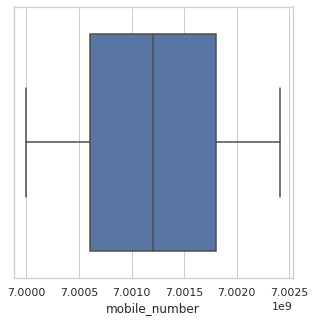

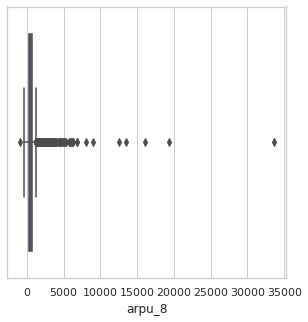

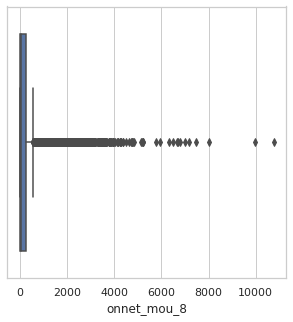

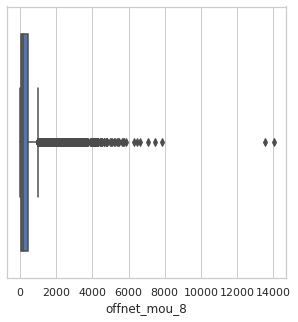

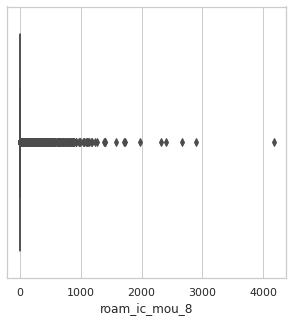

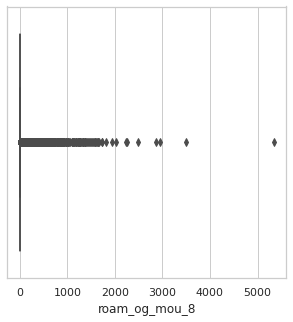

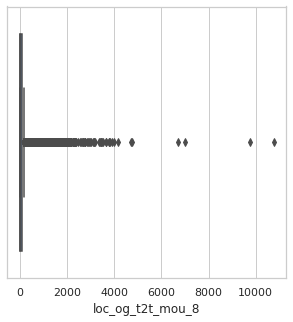

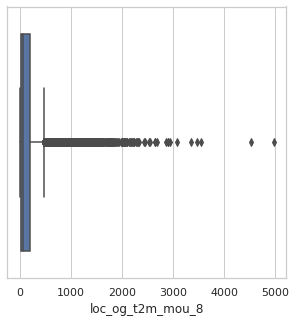

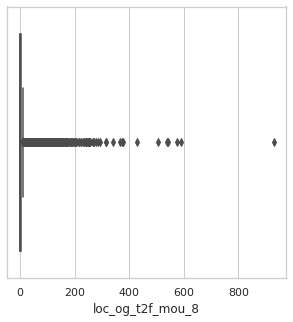

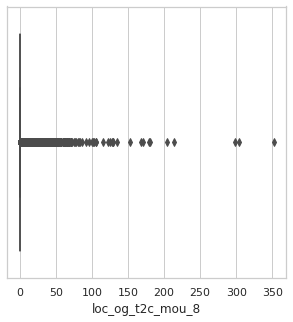

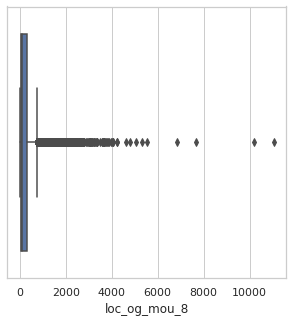

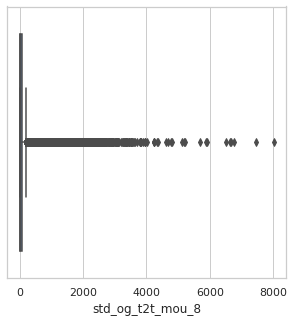

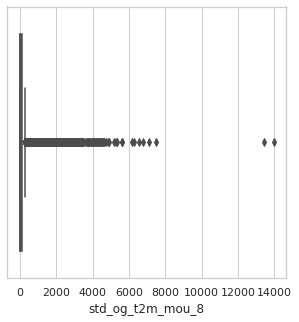

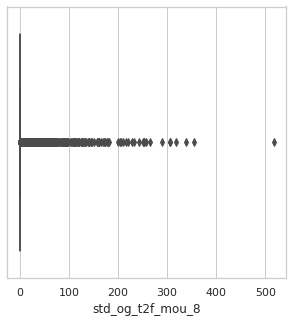

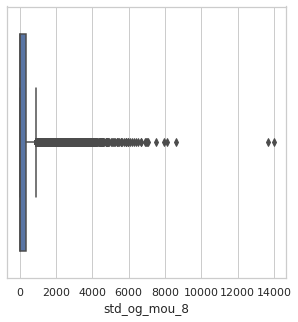

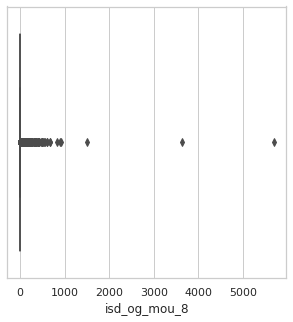

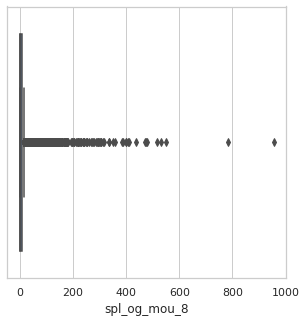

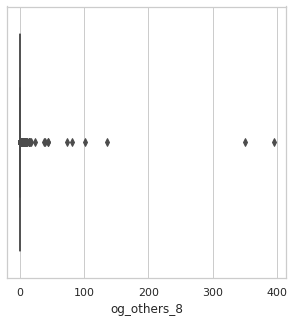

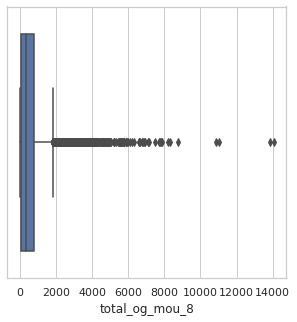

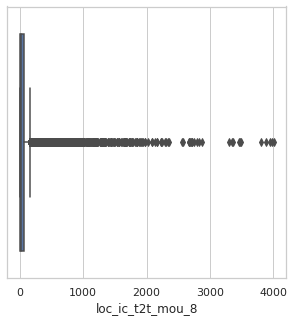

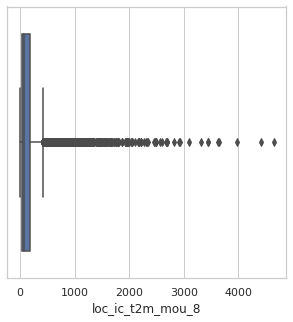

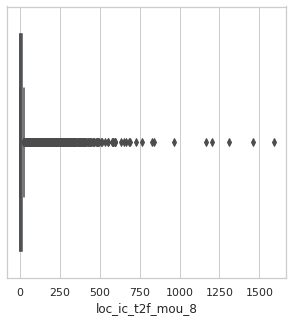

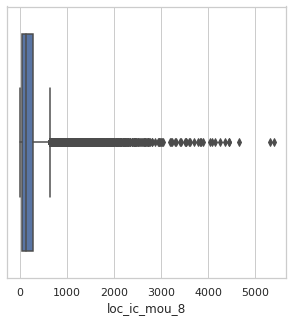

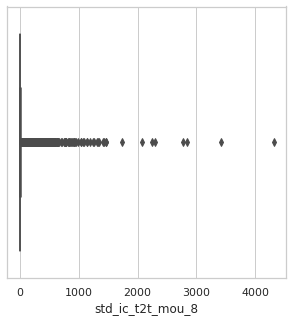

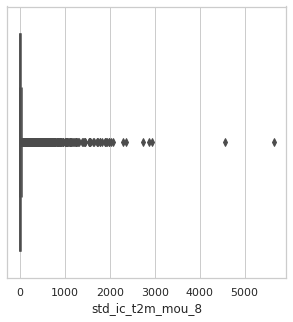

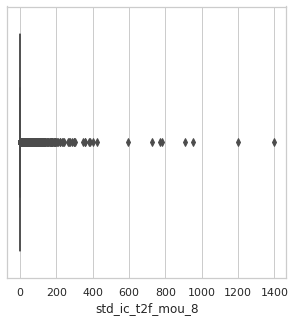

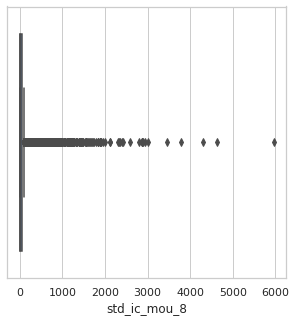

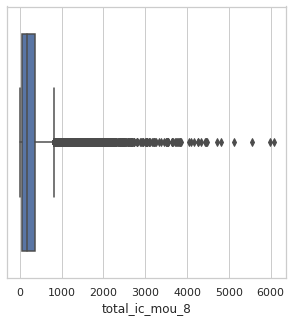

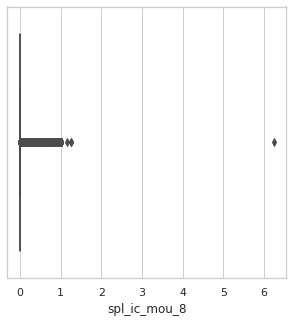

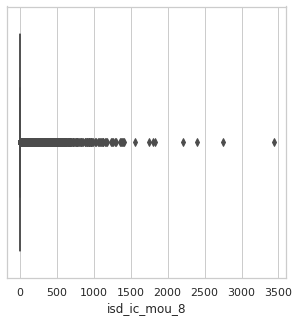

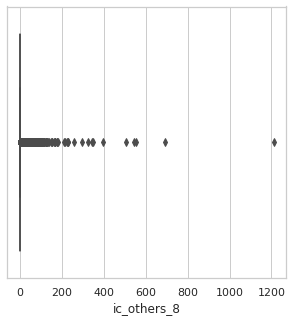

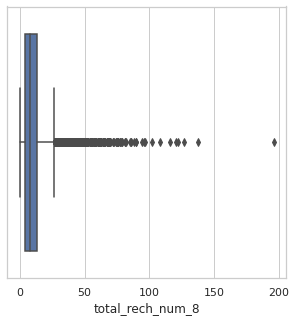

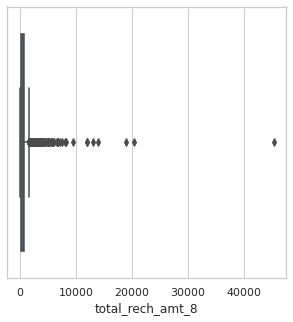

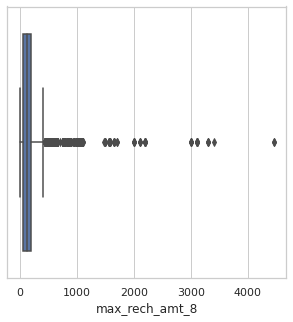

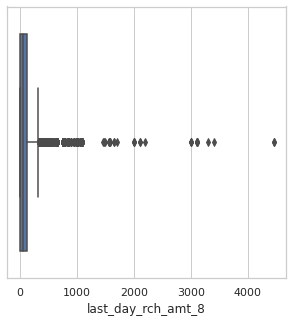

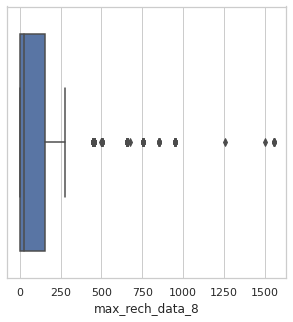

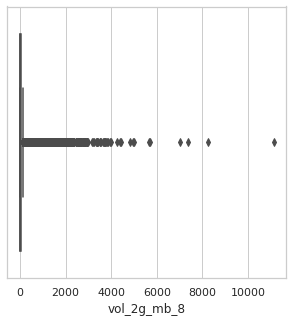

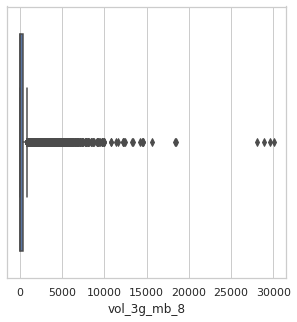

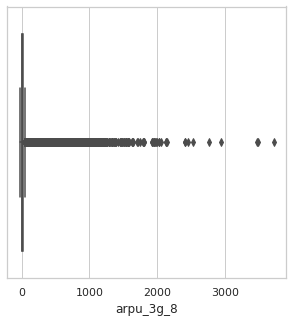

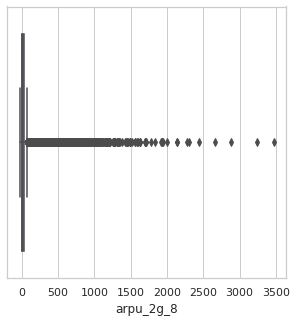

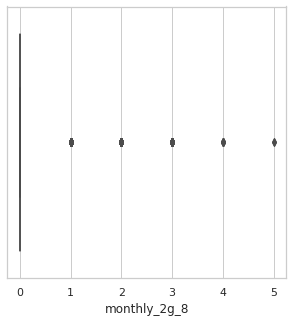

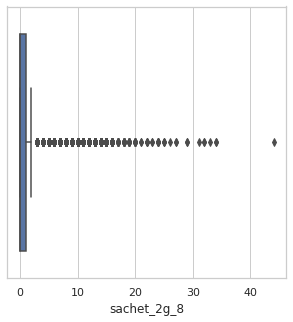

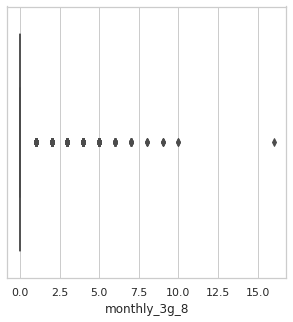

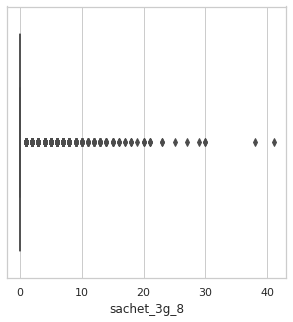

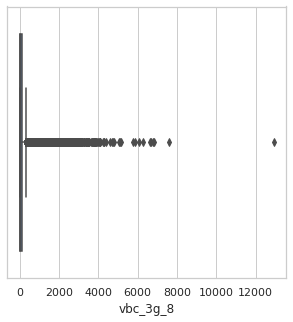

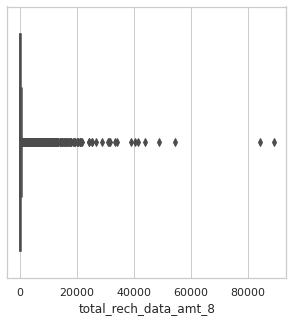

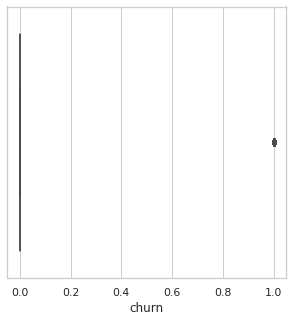

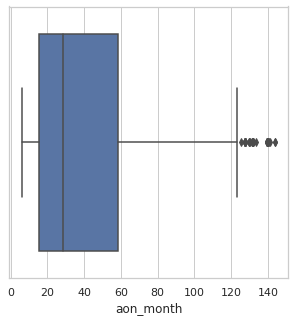

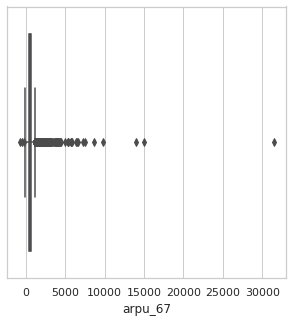

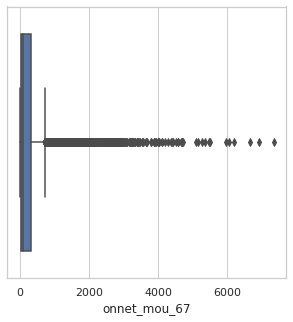

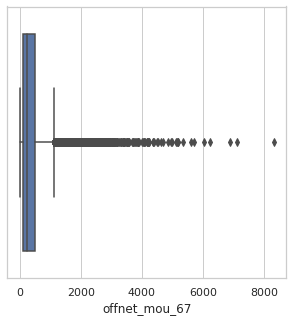

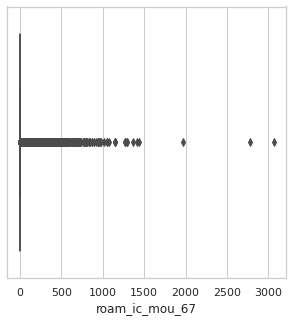

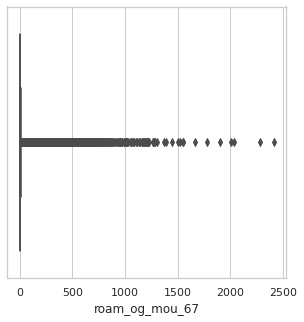

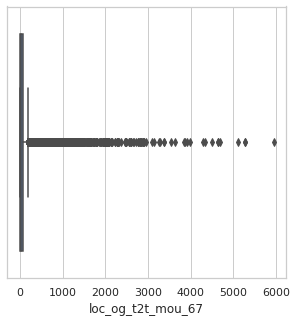

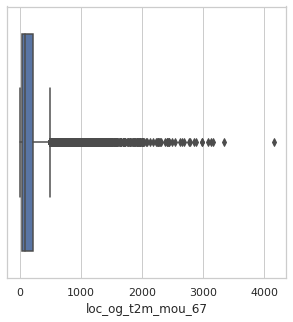

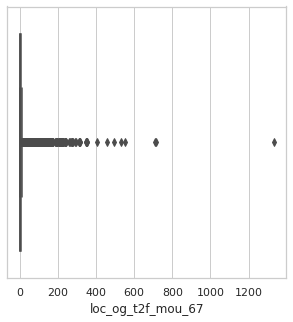

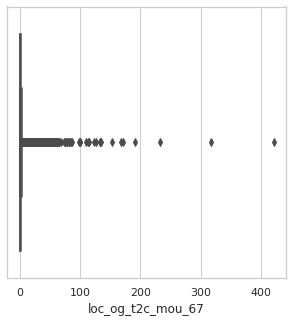

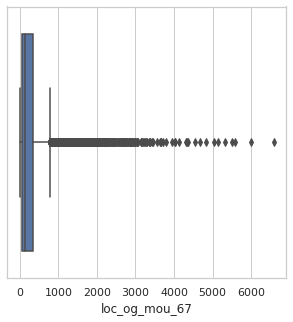

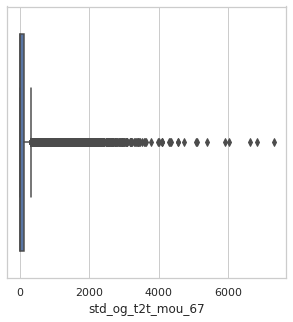

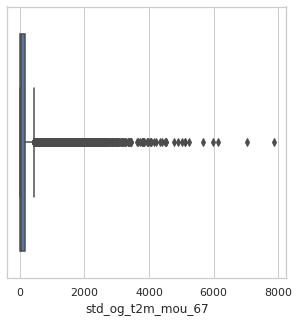

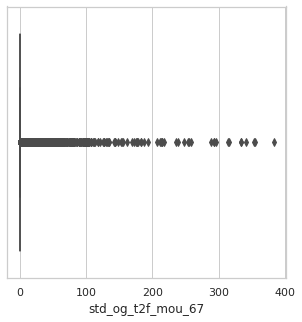

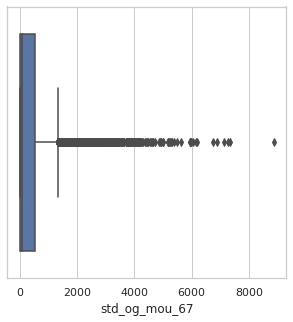

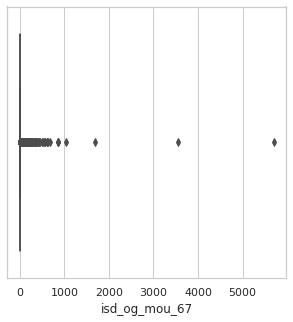

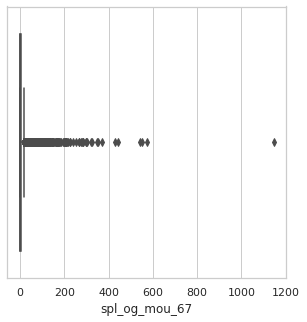

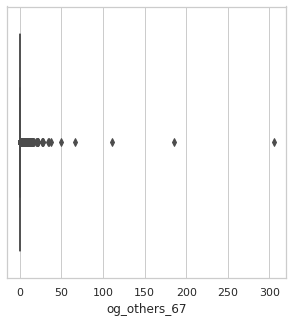

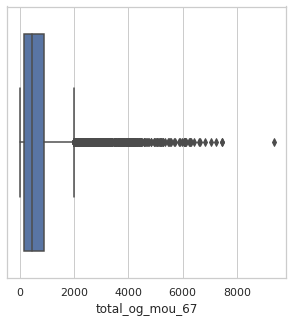

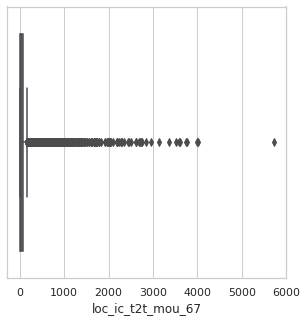

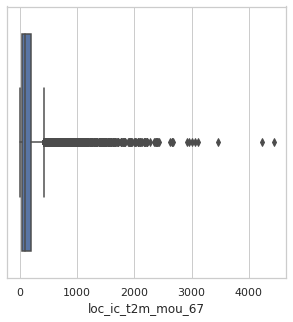

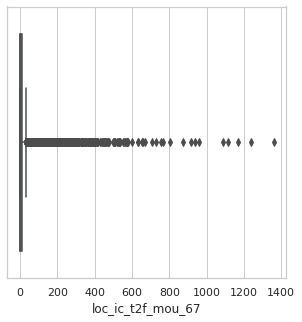

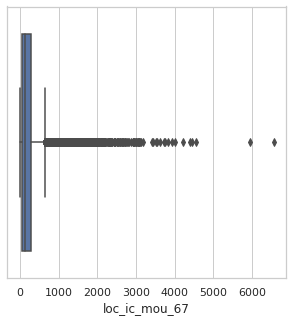

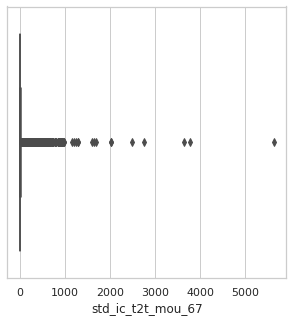

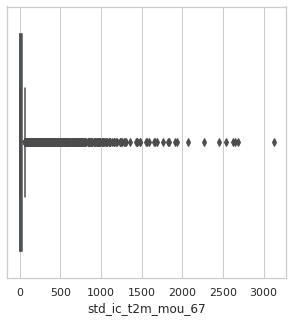

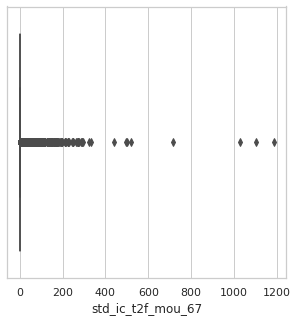

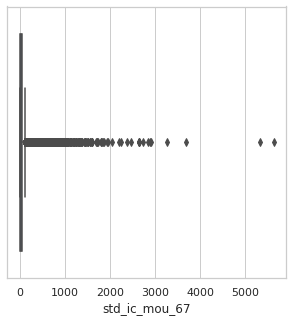

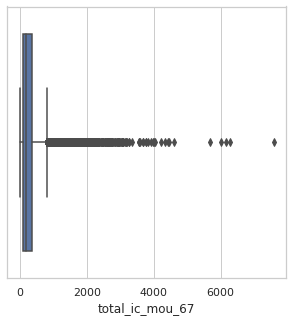

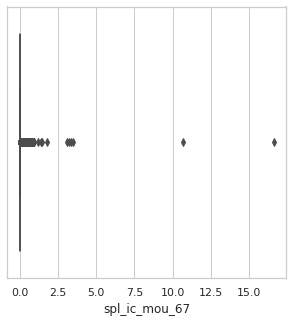

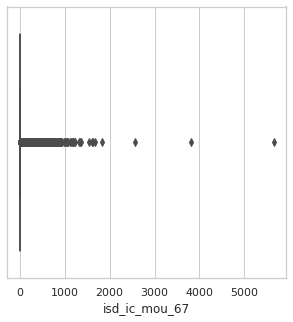

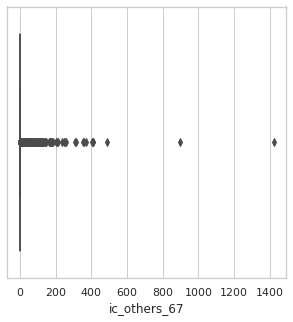

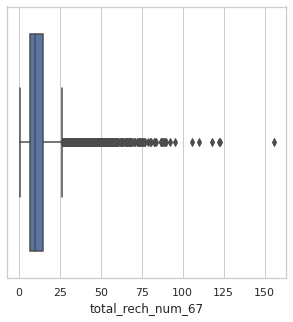

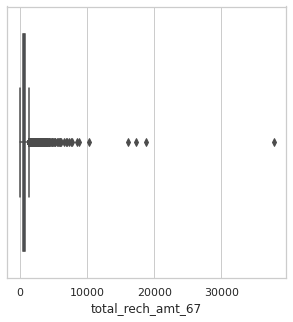

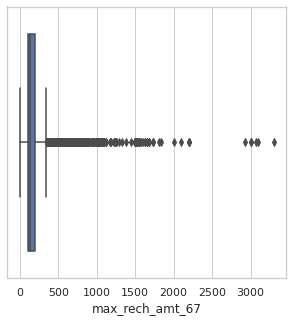

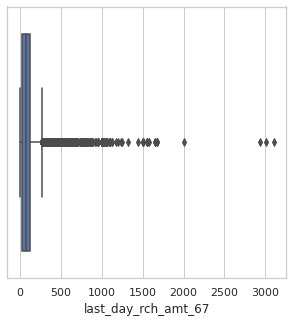

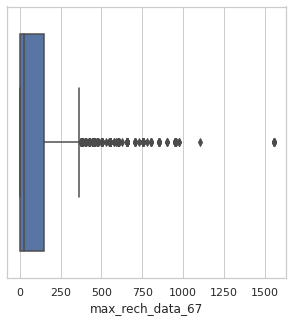

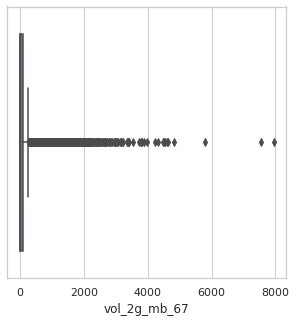

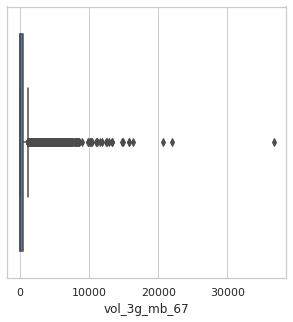

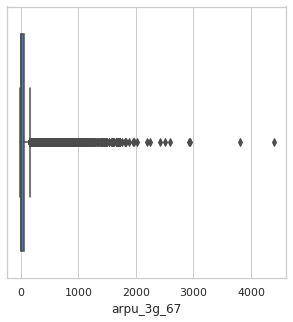

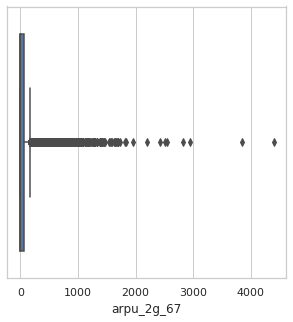

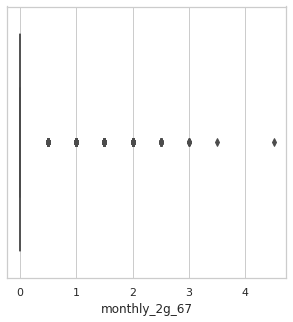

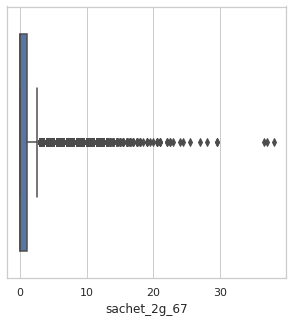

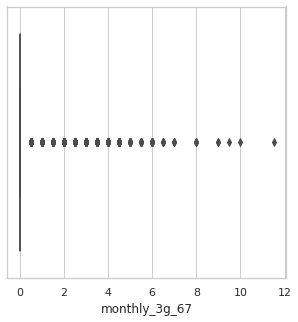

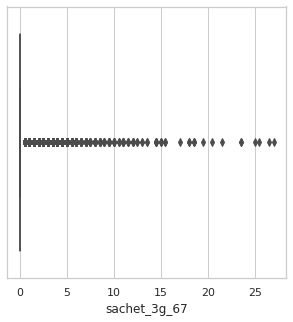

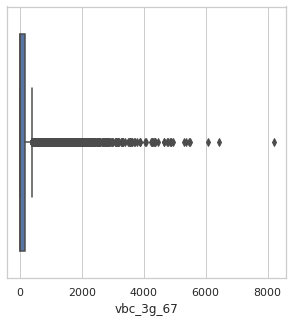

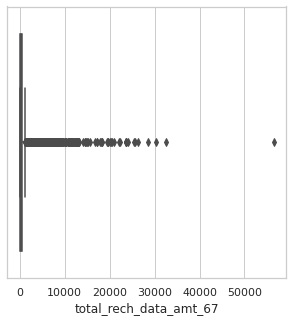

In [49]:
for i in telecom.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(telecom[i])
    plt.show()

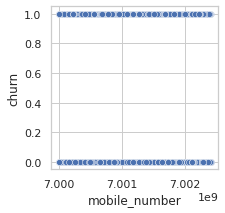

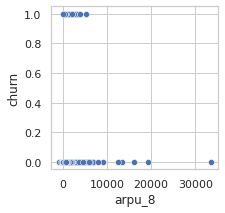

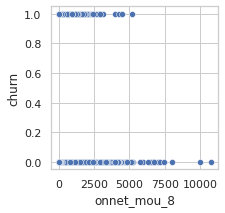

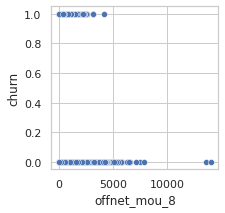

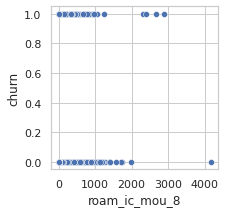

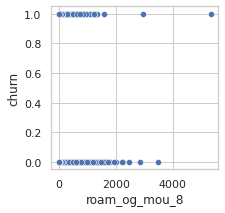

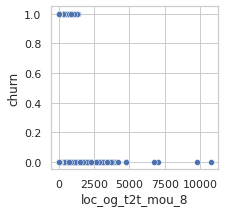

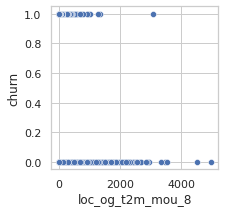

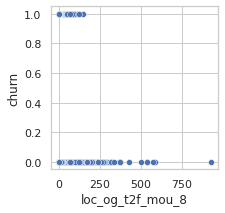

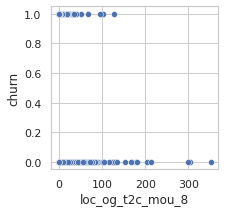

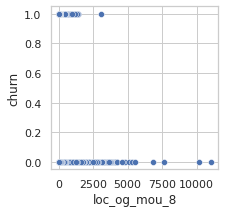

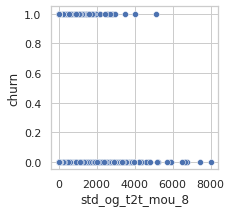

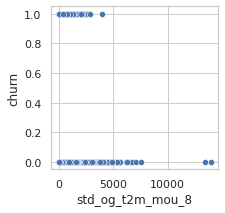

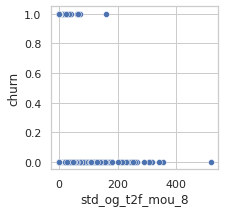

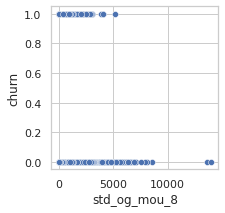

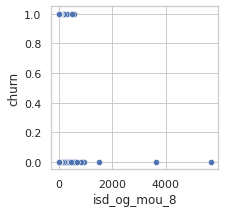

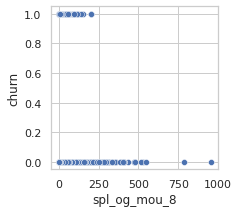

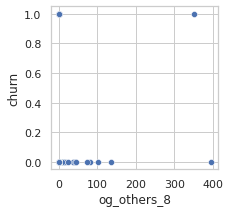

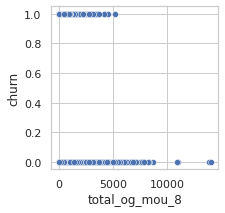

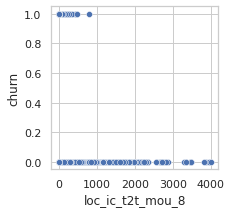

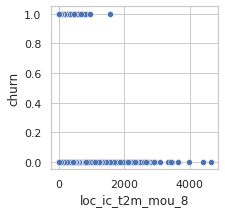

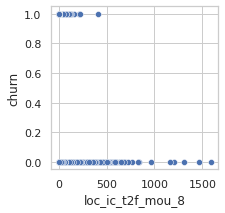

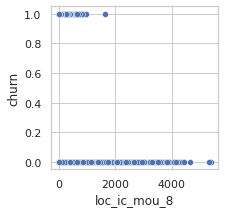

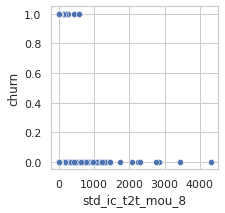

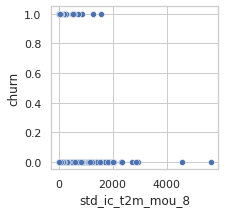

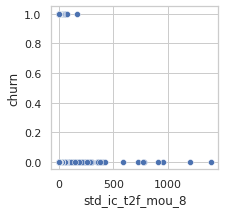

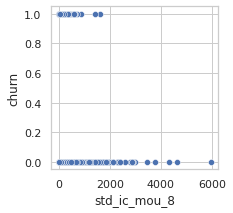

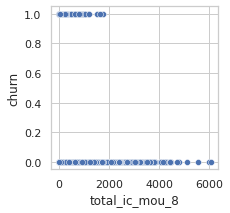

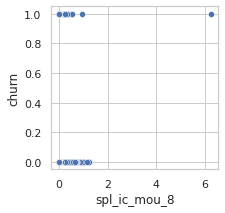

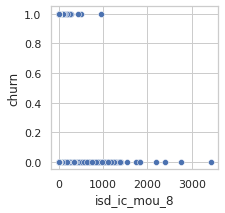

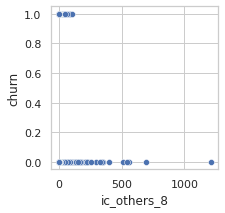

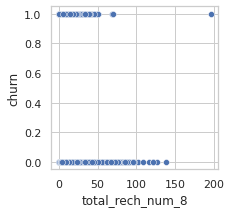

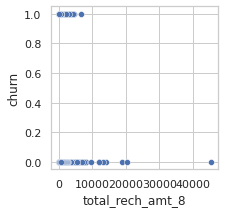

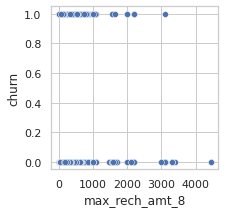

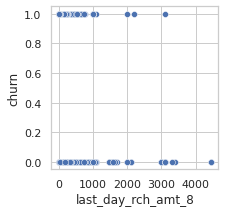

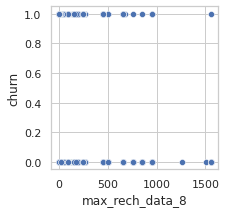

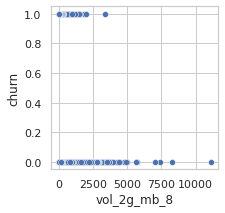

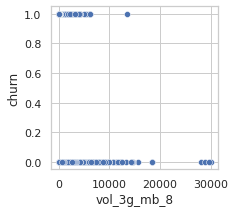

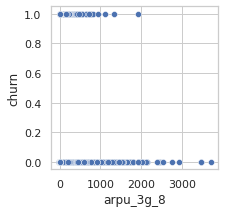

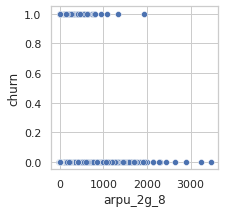

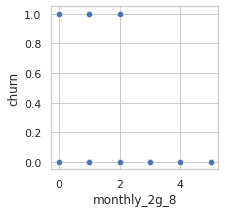

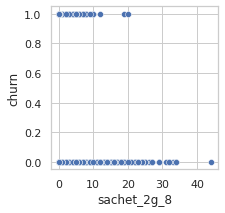

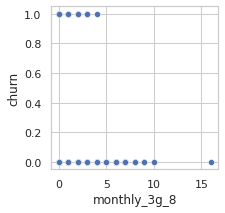

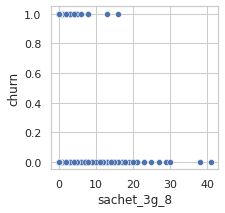

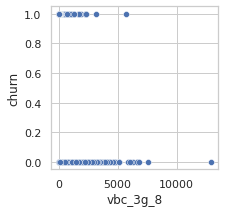

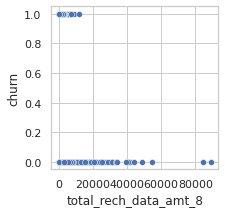

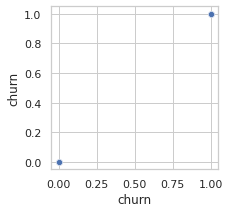

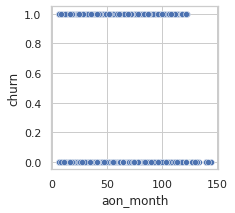

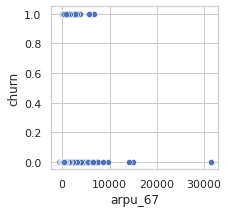

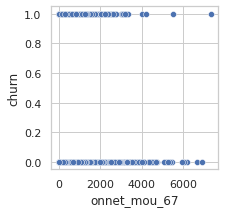

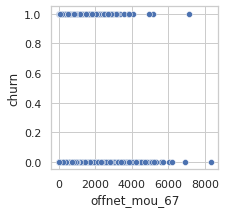

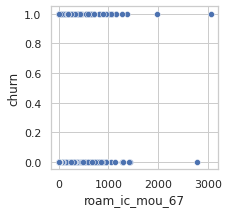

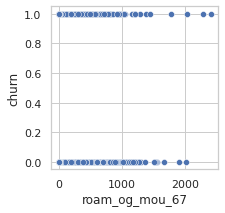

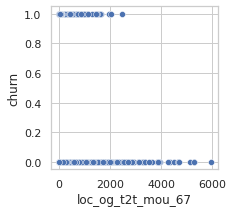

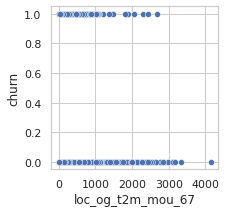

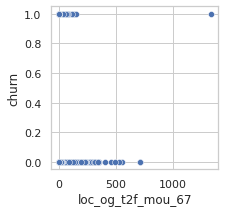

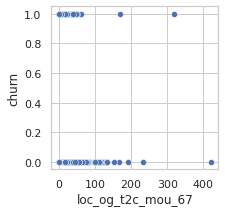

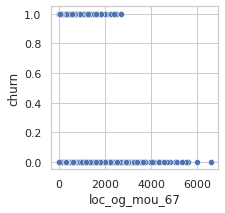

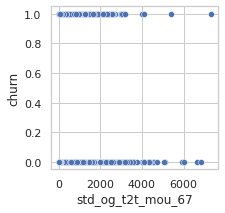

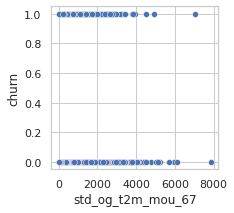

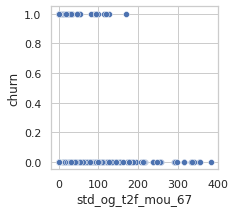

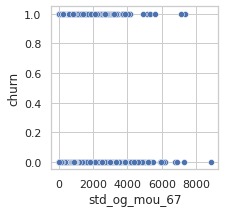

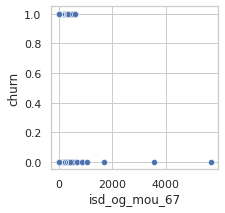

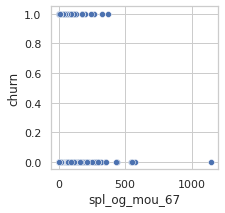

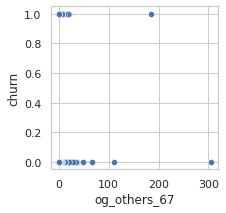

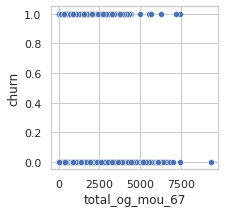

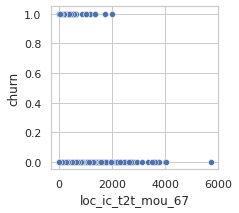

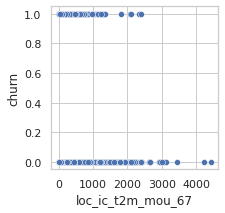

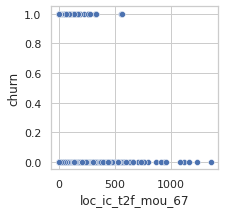

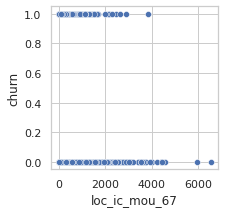

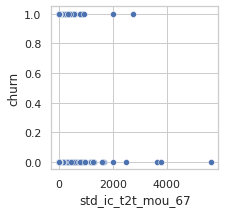

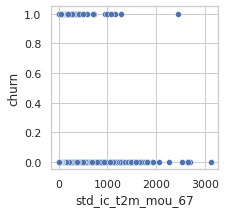

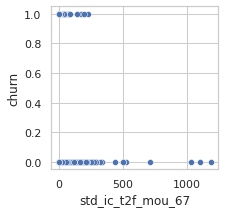

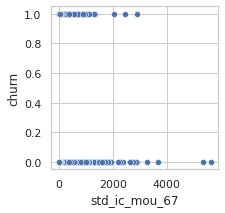

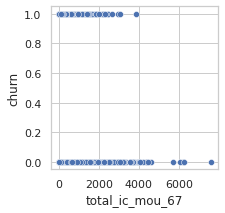

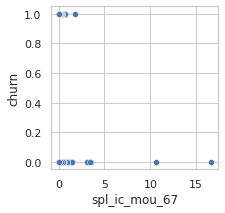

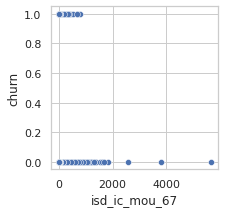

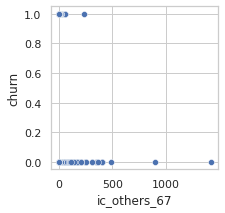

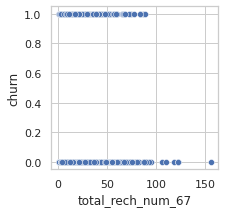

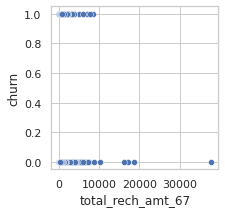

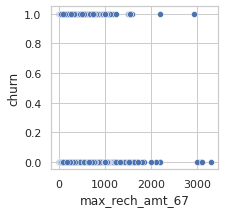

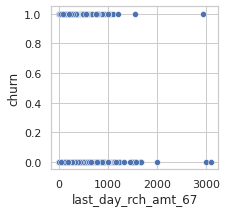

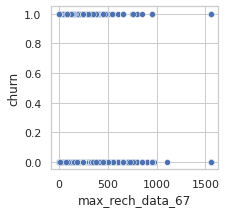

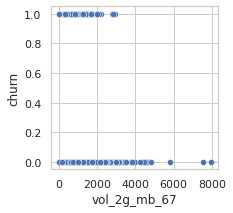

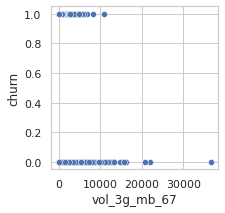

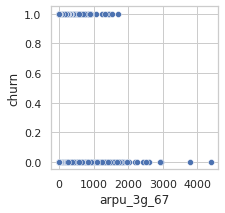

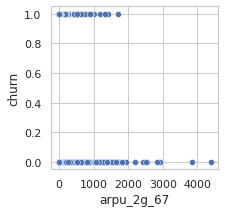

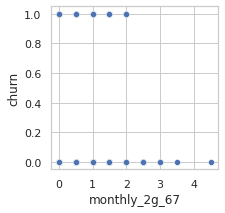

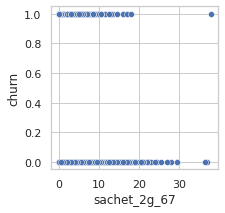

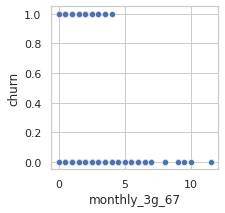

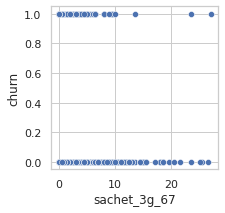

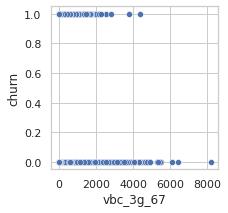

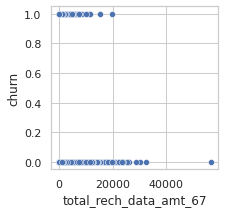

In [50]:
for j in telecom.columns:
        plt.figure(figsize=(3,3))
        sns.scatterplot(telecom[j],telecom['churn'])
        plt.show()
    

Text(0, 0.5, 'number of customers')

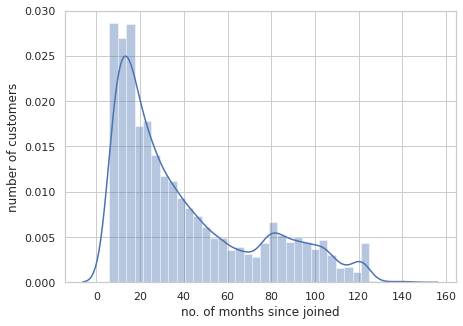

In [51]:
plt.figure(figsize=(7,5))
sns.distplot(telecom['aon_month'], hist=True,  
             bins=int(180/5)  
             )
plt.xlabel('no. of months since joined')
plt.ylabel('number of customers')

Most of the High value customers joined recently

<AxesSubplot:>

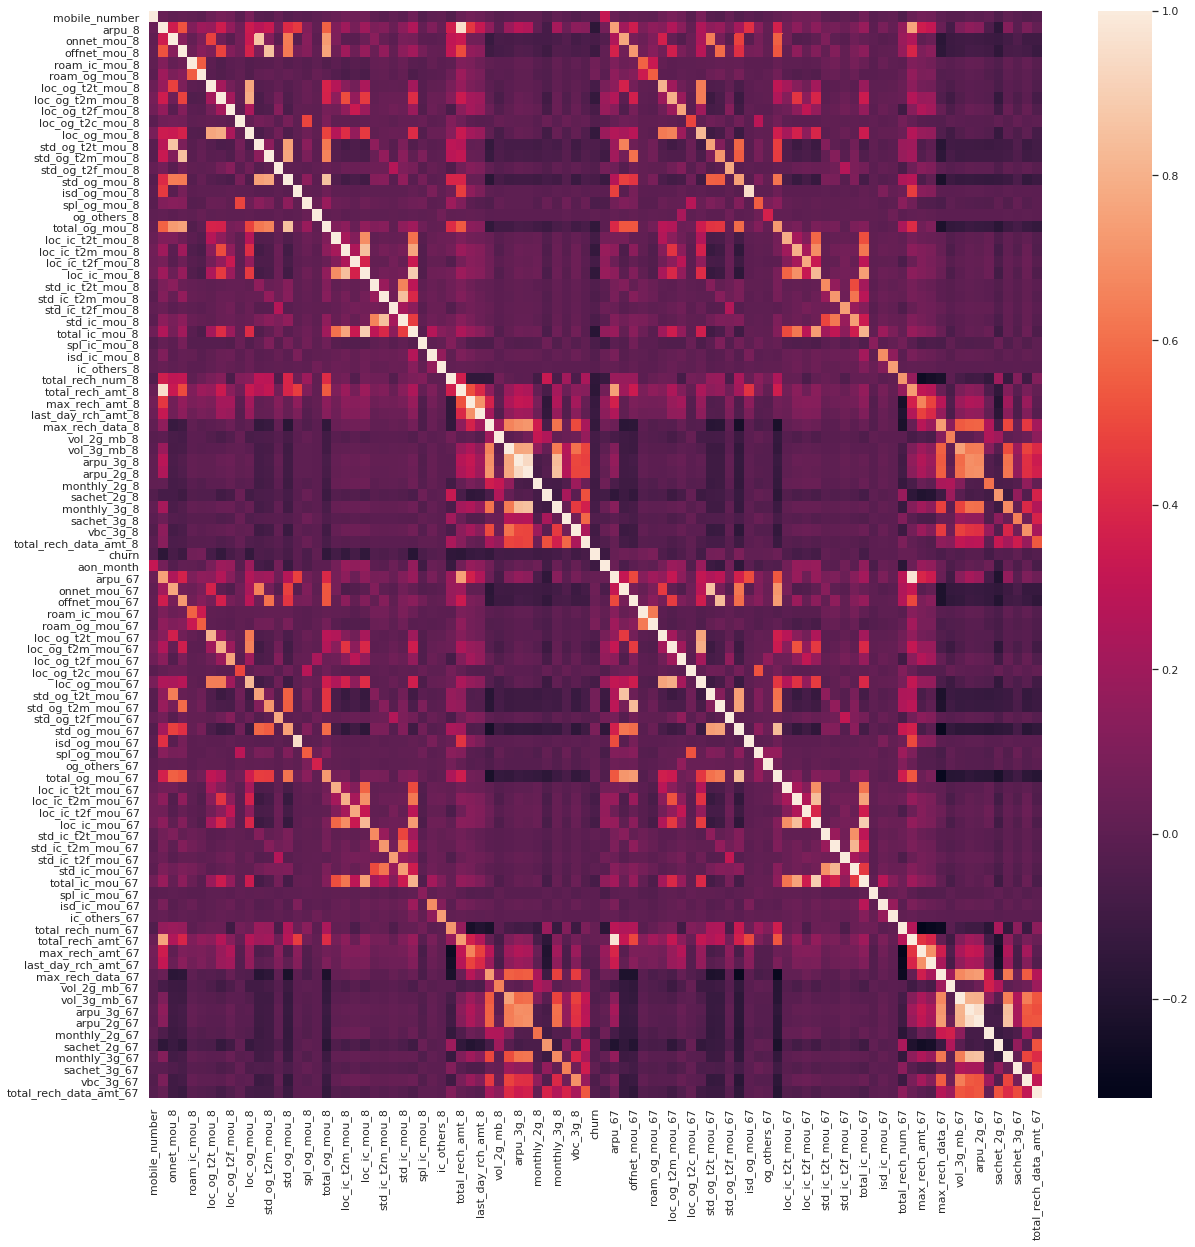

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(telecom.corr())

<AxesSubplot:>

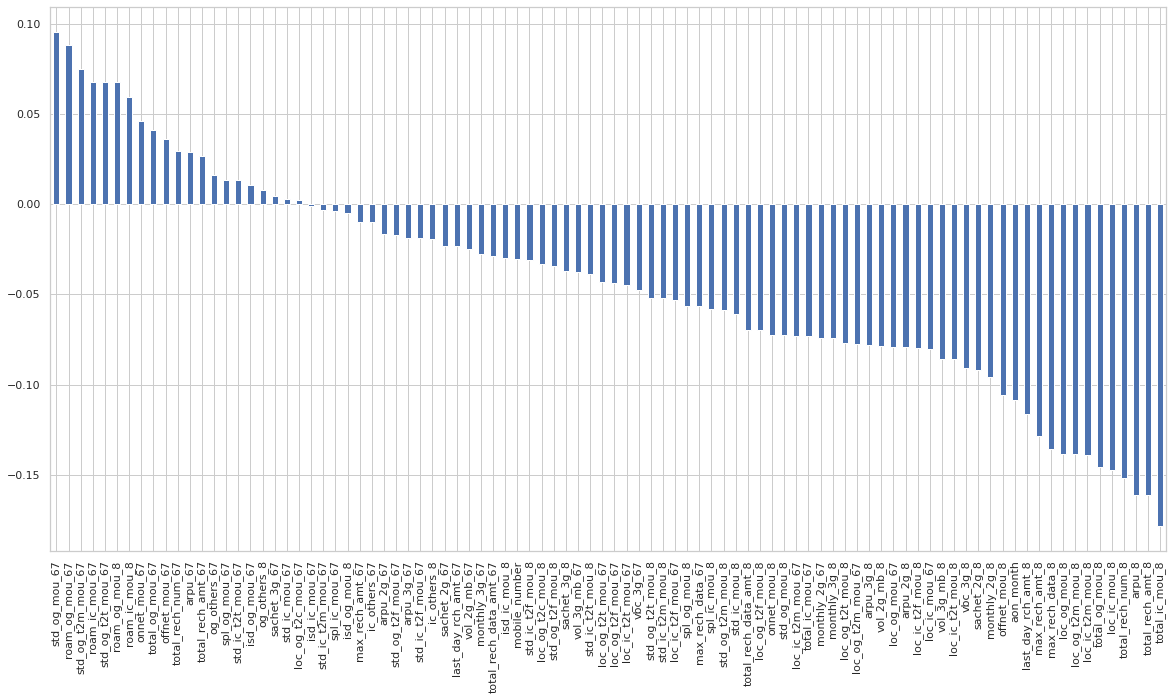

In [53]:
#plotting correlation of churn with other variables
df=telecom.corr()['churn'].sort_values(ascending=False)

plt.figure(figsize=(20,10))
df[1:].plot(kind='bar')

We can note following observations
- std and roaming outgoing calls have high positive correlation with churn, means if these will increase more chances of churn may be there
- whereas negative correlation with recharge amount, ic,og ,arpu thus more recharge and usage in the 8th month less chances of churn

<AxesSubplot:xlabel='churn', ylabel='aon_month'>

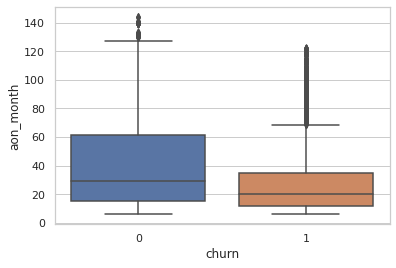

In [54]:
# churn vs age in network
sns.boxplot(telecom['churn'],telecom['aon_month'])

Thus if customer is using the network for longer time there is less churn

<AxesSubplot:xlabel='churn', ylabel='max_rech_amt_8'>

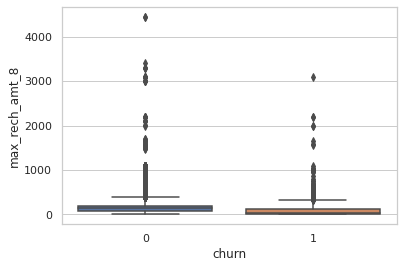

In [55]:
# churn vs age in network
sns.boxplot(telecom['churn'],telecom['max_rech_amt_8'])

# Outlier treatment

In [56]:
telecom.drop('mobile_number',axis=1,inplace=True)

In [57]:
telecom.describe(percentiles=[0,0.01,0.1,0.5,0.6,0.8,0.9,0.95,0.98,1])

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   
mean     508.597957    235.378852    338.682670      12.500551      19.865615   
std      501.961981    457.844464    479.882371      74.125281     104.719009   
min     -945.808000      0.000000      0.000000       0.000000       0.000000   
0%      -945.808000      0.000000      0.000000       0.000000       0.000000   
1%         0.000000      0.000000      0.000000       0.000000       0.000000   
10%       84.000000      0.810000     10.090000       0.000000       0.000000   
50%      427.585000     65.610000    182.790000       0.000000       0.000000   
60%      508.976000    110.360000    263.590000       0.000000       0.000000   
80%      735.931000    323.310000    526.430000       0.000000       0.000000   
90%      977.345000    665.080000    823.680000      15.010000      28.880000   
95%     1255.019000   1074.590000   1167.540000      56.350000     100.510000   
98%     1659.130000   1654.730000   1729.830000     161.830000     254.060000   
100%   33543.624000  10752.560000  14007.340000    4169.810000    5337.040000   
max    33543.624000  10752.560000  14007.340000    4169.810000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          78.536131        153.336181          5.886385          1.707746   
std          227.227313        232.764460         19.502281          7.208138   
min            0.000000          0.000000          0.000000          0.000000   
0%             0.000000          0.000000          0.000000          0.000000   
1%             0.000000          0.000000          0.000000          0.000000   
10%            0.000000          0.860000          0.000000          0.000000   
50%           20.730000         67.760000          0.000000          0.000000   
60%           35.210000        106.140000          0.850000          0.000000   
80%           94.640000        242.590000          5.990000          0.740000   
90%          178.840000        398.510000         15.160000          4.580000   
95%          298.780000        574.760000         28.390000          9.380000   
98%          568.790000        838.980000         56.210000         18.680000   
100%       10752.560000       4961.330000        928.490000        351.830000   
max        10752.560000       4961.330000        928.490000        351.830000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  30001.000000      30001.000000      30001.000000      30001.000000   
mean     238.222058        148.441175        157.479595          1.584734   
std      361.959674        397.564547        409.050964         10.931804   
min        0.000000          0.000000          0.000000          0.000000   
0%         0.000000          0.000000          0.000000          0.000000   
1%         0.000000          0.000000          0.000000          0.000000   
10%        1.880000          0.000000          0.000000          0.000000   
50%      110.810000          0.630000          9.460000          0.000000   
60%      171.460000          9.130000         29.890000          0.000000   
80%      377.460000        142.440000        181.830000          0.000000   
90%      607.830000        475.360000        464.890000          1.280000   
95%      859.780000        887.460000        842.830000          5.930000   
98%     1286.290000       1429.960000       1385.890000         18.730000   
100%   11039.910000       8014.430000      13950.040000        516.910000   
max    11039.910000       8014.430000      13950.040000        516.910000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000    30001.000000   
mean     307.786679     

Almost every column has outliers show lets use capping technique and cap every column using 98 percentile value

In [58]:
for i in telecom.drop(['churn','aon_month'],axis=1).columns:
    telecom[i]=telecom[i].clip(0,telecom[i].quantile(0.98))
    


# Scaling data

In [59]:
y=telecom.pop('churn')
X=telecom

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)

In [62]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model Building


# Model-1 High performance model with PCA

In [63]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
pca=PCA(random_state= 42)
data=X_train
pca.fit(data)
var=pca.explained_variance_ratio_.round(decimals=3)
var*100

array([14.2, 12.1,  8. ,  5.1,  4.6,  3.4,  3.1,  2.9,  2.8,  2.5,  2.4,
        2.1,  2. ,  1.8,  1.7,  1.6,  1.6,  1.5,  1.4,  1.3,  1.3,  1.1,
        1. ,  1. ,  1. ,  1. ,  0.9,  0.9,  0.8,  0.8,  0.8,  0.7,  0.7,
        0.6,  0.6,  0.6,  0.6,  0.5,  0.5,  0.5,  0.4,  0.4,  0.4,  0.4,
        0.4,  0.4,  0.4,  0.3,  0.3,  0.3,  0.3,  0.3,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ])

<AxesSubplot:>

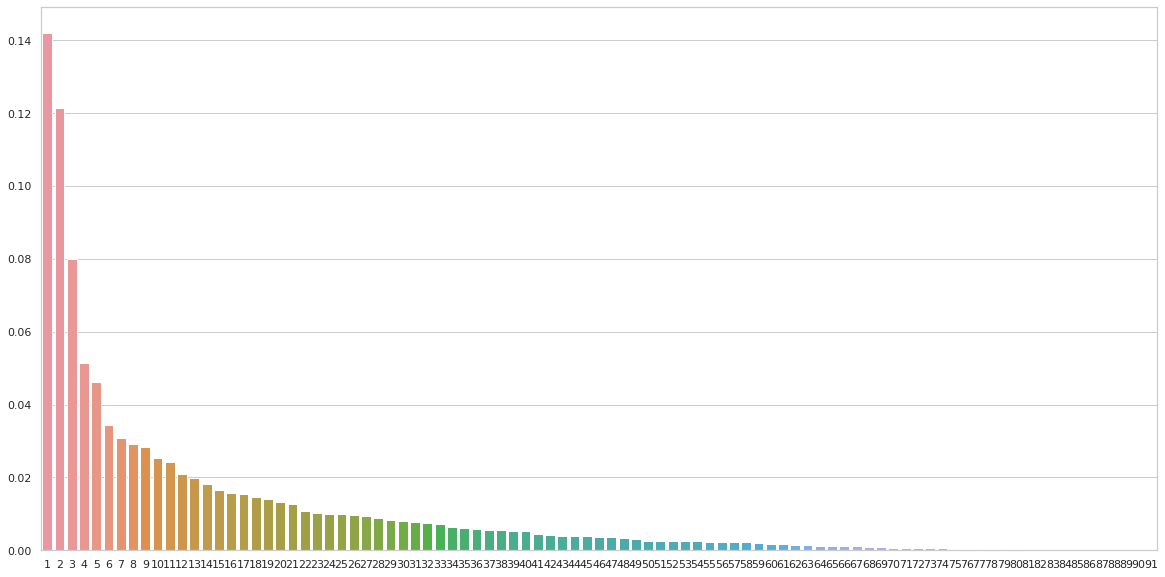

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(x=list(range(1,len(var)+1)),y=pca.explained_variance_ratio_)

In [65]:
#non zero PC
var[var>0].shape

(74,)

<AxesSubplot:>

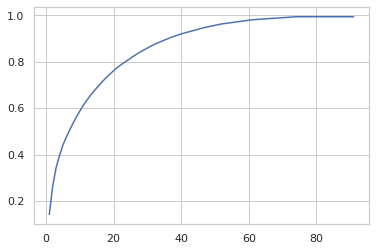

In [66]:
cum_var=np.cumsum(var)
sns.lineplot(list(range(1,len(cum_var)+1)),cum_var)

In [67]:
model_pca=PCA(0.98)
data=model_pca.fit_transform(data)

In [68]:
#pca.explained_variance_ratio_
print ( "Components = ", model_pca.n_components_ , ";\nTotal explained variance = ",
      round(model_pca.explained_variance_ratio_.sum(),5)  )

Components =  59 ;
Total explained variance =  0.98096


In [69]:
data.shape

(24000, 59)

In [70]:
test_data=model_pca.transform(X_test)

# Logistic regression with PCA

In [71]:
from sklearn.linear_model import LogisticRegression 

In [72]:

# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(data, y_train) 
  
y_pred = lr.predict(test_data) 
  
# print classification report 
print(classification_report(y_test, y_pred)) 

#creating a dataframe to track performance of evry model that we build
performance_dict={}
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#1':['Logistic regression without sampling and with PCA',accuracy,precision,recall,f1score]})




              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5476
           1       0.65      0.27      0.38       525

    accuracy                           0.92      6001
   macro avg       0.79      0.63      0.67      6001
weighted avg       0.91      0.92      0.91      6001



In the above model recall of the minority class is very less which shows that there is a need to handle imbalace

In [73]:
#using oversampling technique to handle class imbalance
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
data,y_train=sm.fit_sample(data,y_train.ravel())

In [74]:
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(data, y_train) 
  
y_pred = lr.predict(test_data) 
  
# print classification report 
print(classification_report(y_test, y_pred)) 

accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/(precision+recall)
performance_dict.update({'model#2':['Logistic regression with sampling and PCA',accuracy,precision,recall,f1score]})



              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5476
           1       0.32      0.82      0.46       525

    accuracy                           0.83      6001
   macro avg       0.65      0.83      0.68      6001
weighted avg       0.92      0.83      0.86      6001



- Accuracy has been decreased from 92% to 83%
- but as per the business objective recall is more important here
- recall for minority class has been improved from 25% to 83%

In [75]:
confusion=confusion_matrix(y_test,y_pred)
print(confusion)
recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
print('recall={}%'.format((recall)))

[[4571  905]
 [  92  433]]
recall=0.8247619047619048%


# Decision Tree with PCA

In [76]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(data, y_train)

DecisionTreeClassifier(max_depth=5)

In [77]:


# Making predictions
y_pred = dt.predict(test_data)

# Printing classification report
print(classification_report(y_test, y_pred))

accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/(precision+recall)
performance_dict.update({'model#3':['Decision Tree with sampling and PCA without gridsearch',accuracy,precision,recall,f1score]})


              precision    recall  f1-score   support

           0       0.97      0.85      0.91      5476
           1       0.32      0.73      0.44       525

    accuracy                           0.84      6001
   macro avg       0.64      0.79      0.67      6001
weighted avg       0.91      0.84      0.86      6001



In [78]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [79]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(data,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [80]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.735919      0.025656         0.002143        0.000287   
1       1.740233      0.023690         0.001978        0.000106   
2       1.934534      0.109798         0.002525        0.000589   
3       1.974574      0.227438         0.002152        0.000197   
4       3.489974      0.212395         0.002584        0.000354   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                     50   
1         entropy               5                     50   
2         entropy               5                    100   
3         entropy               5                    100   
4         entropy              10                     50   

  param_min_samples_split                                             params  \
0                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                      50  {'criterion': 'entropy', 'max_depth': 10, 'min...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.791374           0.795676           0.801789           0.791803   
1           0.791374           0.795676           0.801789           0.791803   
2           0.787978           0.796355           0.801789           0.792370   
3           0.787978           0.796355           0.801789           0.792370   
4           0.834503           0.840955           0.842767           0.838786   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.800294         0.796187        0.004263               13  
1           0.800294         0.796187        0.004263               13  
2           0.798936         0.795485        0.004867               15  
3           0.798936         0.795485        0.004867               15  
4           0.841051         0.839612        0.002850                1

In [81]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8396124029199677
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50)


In [82]:
#building the optimal model from the result of grid search cv
final_dt=DecisionTreeClassifier(max_depth=10,min_samples_leaf=50,min_samples_split=100,criterion='gini')
final_dt.fit(data,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)

In [83]:
y_pred=final_dt.predict(test_data)

In [84]:
print(accuracy_score(y_test,y_pred))

0.832027995334111


In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      5476
           1       0.30      0.69      0.42       525

    accuracy                           0.83      6001
   macro avg       0.63      0.77      0.66      6001
weighted avg       0.91      0.83      0.86      6001



In [86]:
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#4':['Decision Tree with sampling and PCA with gridsearch',accuracy,precision,recall,f1score]})


## Random Forest with PCA

In [87]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier


# Running the random forest with default parameters.
rfc_pca = RandomForestClassifier(random_state=57)

In [88]:
# fit
rfc_pca.fit(data,y_train)

RandomForestClassifier(random_state=57)

In [89]:
# Making predictions
y_pred = rfc_pca.predict(test_data)


In [90]:
#Let's check the report of our default model
print(classification_report(y_test,y_pred))
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#5':['Random Forest with sampling and PCA without gridsearch',accuracy,precision,recall,f1score]})



              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5476
           1       0.56      0.57      0.56       525

    accuracy                           0.92      6001
   macro avg       0.76      0.76      0.76      6001
weighted avg       0.92      0.92      0.92      6001



In [91]:
#fitting hyperparameters
# Create the parameter grid 
param_grid = {
    'max_depth': [4,8,10],
    #'min_samples_leaf': range(100, 400, 200),
    #'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

n_folds = 3

# Instantiate the grid search model
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(data,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 18.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [92]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9096405286940382
RandomForestClassifier(max_depth=10, max_features=10, n_estimators=200)


In [93]:
# building model with fitted parameters
rfc_final = RandomForestClassifier(random_state=57,n_estimators=300,max_depth=10,max_features=10)
rfc_final.fit(data,y_train)

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=300,
                       random_state=57)

In [94]:
y_pred=rfc_final.predict(test_data)

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5476
           1       0.43      0.72      0.54       525

    accuracy                           0.89      6001
   macro avg       0.70      0.81      0.74      6001
weighted avg       0.92      0.89      0.90      6001



In [96]:
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#6':['Random Forest with sampling and PCA with gridsearch',accuracy,precision,recall,f1score]})



## SVM with PCA

In [97]:
from sklearn.svm import SVC
# fitting a linear svc
model_linear = SVC(kernel='linear')
model_linear.fit(data, y_train)


# predict
y_pred = model_linear.predict(test_data)


In [98]:
print(accuracy_score(y_test,y_pred))

0.8448591901349775


In [99]:
#Let's check the report of our default model
print(classification_report(y_test,y_pred))
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#7':['SVM with sampling and PCA linear kernel',accuracy,precision,recall,f1score]})



              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5476
           1       0.34      0.82      0.48       525

    accuracy                           0.84      6001
   macro avg       0.66      0.83      0.69      6001
weighted avg       0.92      0.84      0.87      6001



In [100]:
from sklearn.svm import SVC
# fitting a linear svc
model_linear = SVC(kernel='poly')
model_linear.fit(data, y_train)


# predict
y_pred = model_linear.predict(test_data)


In [101]:
print(accuracy_score(y_test,y_pred))

0.8925179136810532


In [102]:
#Let's check the report of our default model
print(classification_report(y_test,y_pred))
#Let's check the report of our default model
print(classification_report(y_test,y_pred))
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#8':['SVM with sampling and PCA polynomial kernel',accuracy,precision,recall,f1score]})

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5476
           1       0.43      0.72      0.54       525

    accuracy                           0.89      6001
   macro avg       0.70      0.81      0.74      6001
weighted avg       0.92      0.89      0.90      6001

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5476
           1       0.43      0.72      0.54       525

    accuracy                           0.89      6001
   macro avg       0.70      0.81      0.74      6001
weighted avg       0.92      0.89      0.90      6001



In [103]:
from sklearn.svm import SVC
# fitting a linear svc
model_linear = SVC(kernel='rbf')
model_linear.fit(data, y_train)


# predict
y_pred = model_linear.predict(test_data)


In [104]:
print(accuracy_score(y_test,y_pred))

0.8953507748708549


In [105]:
print(classification_report(y_test,y_pred))
#Let's check the report of our default model
print(classification_report(y_test,y_pred))
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#9':['SVM with sampling and PCA radial kernel',accuracy,precision,recall,f1score]})

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5476
           1       0.44      0.73      0.55       525

    accuracy                           0.90      6001
   macro avg       0.71      0.82      0.75      6001
weighted avg       0.93      0.90      0.91      6001

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5476
           1       0.44      0.73      0.55       525

    accuracy                           0.90      6001
   macro avg       0.71      0.82      0.75      6001
weighted avg       0.93      0.90      0.91      6001



In [106]:
import xgboost as xgb

# Running the random forest with default parameters.
xg = xgb.XGBClassifier(random_state=42)

In [107]:
xg.fit(data,y_train)
y_pred=xg.predict(test_data)

[20:13:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [108]:
print(accuracy_score(y_test,y_pred))

0.9086818863522746


In [109]:
print(classification_report(y_test,y_pred))
#Let's check the report of our default model
print(classification_report(y_test,y_pred))
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#10':['XGBoost with sampling and PCA ',accuracy,precision,recall,f1score]})

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      5476
           1       0.48      0.64      0.55       525

    accuracy                           0.91      6001
   macro avg       0.72      0.79      0.75      6001
weighted avg       0.92      0.91      0.91      6001

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      5476
           1       0.48      0.64      0.55       525

    accuracy                           0.91      6001
   macro avg       0.72      0.79      0.75      6001
weighted avg       0.92      0.91      0.91      6001



We have tried to fit lot off models to the transformed data
- best accuracy we got using random forest which is 92% but the recall for churn class was 58%.
- Using SVM with rbf kernel we are getting 89% accuracy and 74% recall, but it may be computationally very costly to deploy
- Using linear SVM we are getting 84% accuracy and 82% recall as well so i recommend to use SVM with linear kernel to predict the churn
- Logistic regression's accuracy was 83% and recall 82% thus we could also use logistic regression as a second choice for model.

# Building Interpretable model

Model 1 Logistic regression
- We will not use PCA for this we use original features without any transformation
- First we use oversampling to handle class balance then we aplly model

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
#sm=SMOTE(random_state=2)
#X_train,y_train=sm.fit_sample(X_train,y_train)

In [111]:
#scaling the variables
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=pd.DataFrame(X_train)

In [112]:
X_train.describe()

0             1             2             3             4   \
count  2.400000e+04  2.400000e+04  2.400000e+04  2.400000e+04  2.400000e+04   
mean  -1.820396e-16 -6.744952e-17 -1.019555e-17  1.173376e-15 -1.458093e-17   
std    1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00   
min   -1.347530e+00 -6.123658e-01 -8.455094e-01 -2.824849e-01 -2.943675e-01   
25%   -7.118787e-01 -5.686538e-01 -6.813272e-01 -2.824849e-01 -2.943675e-01   
50%   -1.824811e-01 -4.271291e-01 -3.667964e-01 -2.824849e-01 -2.943675e-01   
75%    4.599890e-01  6.407710e-02  3.095371e-01 -2.824849e-01 -2.943675e-01   
max    3.172868e+00  4.021295e+00  3.682305e+00  5.412326e+00  5.211307e+00   

                 5             6             7             8             9   \
count  2.400000e+04  2.400000e+04  2.400000e+04  2.400000e+04  2.400000e+04   
mean   5.580721e-17 -5.734302e-17  2.508322e-15  5.382916e-16 -4.130955e-17   
std    1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00   
min   -5.867935e-01 -7.697497e-01 -4.435661e-01 -3.646169e-01 -7.891035e-01   
25%   -5.485505e-01 -6.693642e-01 -4.435661e-01 -3.646169e-01 -6.788759e-01   
50%   -4.015932e-01 -4.135825e-01 -4.435661e-01 -3.646169e-01 -4.031322e-01   
75%    6.001607e-02  2.748072e-01 -9.300376e-02 -3.618554e-01  2.987682e-01   
max    4.519366e+00  3.672307e+00  4.622015e+00  4.793748e+00  3.710566e+00   

                 10            11            12            13            14  \
count  2.400000e+04  2.400000e+04  2.400000e+04  2.400000e+04  2.400000e+04   
mean  -7.471917e-16 -3.501273e-16 -5.787500e-17 -4.685141e-17 -5.953756e-16   
std    1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00   
min   -4.384911e-01 -4.820562e-01 -2.679116e-01 -5.765082e-01 -1.919656e-01   
25%   -4.384911e-01 -4.820562e-01 -2.679116e-01 -5.764484e-01 -1.919656e-01   
50%   -4.364891e-01 -4.497502e-01 -2.679116e-01 -5.255920e-01 -1.919656e-01   
75%   -1.826696e-01 -7.598857e-02 -2.679116e-01  1.350080e-01 -1.919656e-01   
max    4.254447e+00  4.245771e+00  5.499624e+00  3.702266e+00  6.327636e+00   

                 15       16            17            18            19  \
count  2.400000e+04  24000.0  2.400000e+04  2.400000e+04  2.400000e+04   
mean  -7.992681e-17      0.0 -3.560115e-17 -3.259985e-16  5.790044e-17   
std    1.000021e+00      0.0  1.000021e+00  1.000021e+00  1.000021e+00   
min   -5.294324e-01      0.0 -8.914056e-01 -6.829170e-01 -8.541718e-01   
25%   -5.294324e-01      0.0 -7.705290e-01 -5.964318e-01 -6.641620e-01   
50%   -4.880716e-01      0.0 -3.310334e-01 -3.975671e-01 -3.704006e-01   
75%    6.308516e-02      0.0  4.095524e-01  1.472700e-01  2.756265e-01   
max    4.237640e+00      0.0  3.375396e+00  4.208849e+00  3.692018e+00   

                 20            21            22            23            24  \
count  2.400000e+04  2.400000e+04  2.400000e+04  2.400000e+04  2.400000e+04   
mean   1.215740e-16  5.308254e-17 -4.829956e-16 -1.173043e-16 -4.402636e-16   
std    1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00   
min   -4.909314e-01 -8.852717e-01 -4.190984e-01 -5.071190e-01 -3.191758e-01   
25%   -4.909314e-01 -6.734152e-01 -4.190984e-01 -5.071190e-01 -3.191758e-01   
50%   -4.238375e-01 -3.630663e-01 -4.143550e-01 -4.218217e-01 -3.191758e-01   
75%   -4.299824e-02  2.869874e-01 -1.154107e-01 -4.072025e-03 -3.066980e-01   
max    4.565773e+00  3.666063e+00  4.951334e+00  4.603360e+00  5.241759e+00   

                 25            26            27            28            29  \
count  2.400000e+04  2.400000e+04  2.400000e+04  2.400000e+04  2.400000e+04   
mean   8.941921e-18  7.518985e-17 -6.599536e-16 -7.642729e-16 -1.315718e-16   
std    1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00   
min   -5.393592e-01 -9.095252e-01 -2.698430e-01 -2.926388e-01 -2.954749e-01   
25%   -5.249224e-01 -6.996207e-01 -2.698430e-01 -2.926388e-01 -2.954749e-01   
50%   -4.025051e-01 -3.25628

In [113]:
#handling class imbalance
sm=SMOTE(random_state=2)
X_train,y_train=sm.fit_sample(X_train,y_train)

In [114]:
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train) 
  
y_pred = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred)) 
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#11':['Logistic regression without PCA simple model',accuracy,precision,recall,f1score]})

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      5476
           1       0.37      0.82      0.51       525

    accuracy                           0.86      6001
   macro avg       0.67      0.84      0.71      6001
weighted avg       0.93      0.86      0.88      6001



<AxesSubplot:title={'center':'Top 15 predictor'}, xlabel='Coefficients', ylabel='Feature'>

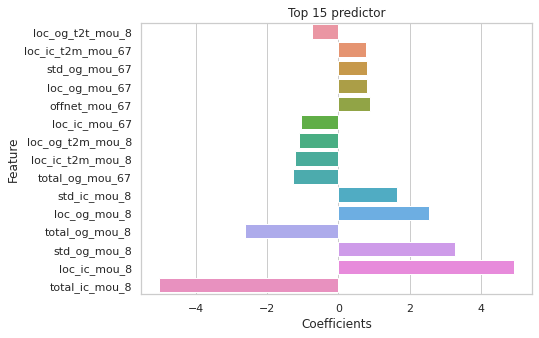

In [115]:
#printing feature importance
coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.transpose(lr.coef_).reshape(-1)})
coefficients=coefficients.iloc[coefficients['Coefficients'].abs().argsort()]
coefficients=coefficients.tail(15)
plt.figure(figsize=(7,5))
plt.title("Top 15 predictor")
sns.barplot(coefficients['Coefficients'],coefficients['Feature'],orient = 'h')

In [116]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred)) 
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#12':['Decision Tree without PCA simple model',accuracy,precision,recall,f1score]})

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5476
           1       0.36      0.75      0.48       525

    accuracy                           0.86      6001
   macro avg       0.66      0.81      0.70      6001
weighted avg       0.92      0.86      0.88      6001



In [117]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [118]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8970525480976581
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50)


In [119]:
#building the optimal model from the result of grid search cv
final_dt=DecisionTreeClassifier(max_depth=10,min_samples_leaf=50,min_samples_split=50,criterion='entropy')
final_dt.fit(X_train,y_train)
y_pred = final_dt.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred)) 
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#13':['Decision Tree without PCA simple model with gridsearch',accuracy,precision,recall,f1score]})

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5476
           1       0.42      0.70      0.53       525

    accuracy                           0.89      6001
   macro avg       0.70      0.80      0.73      6001
weighted avg       0.92      0.89      0.90      6001



In [120]:
final_dt.tree_.compute_feature_importances(normalize=True)

array([2.72360361e-03, 1.07855653e-03, 2.26255481e-03, 3.05143213e-02,
       1.32613536e-01, 1.21401291e-03, 1.85074966e-03, 1.20703777e-03,
       1.78428649e-03, 6.52499163e-03, 0.00000000e+00, 1.77756575e-02,
       0.00000000e+00, 5.85281261e-03, 2.75700338e-03, 2.66194493e-03,
       0.00000000e+00, 1.15611398e-02, 4.64836746e-03, 1.79054733e-03,
       2.00580009e-02, 2.80605793e-02, 0.00000000e+00, 1.89625417e-03,
       7.75456520e-04, 5.68213079e-04, 3.94614816e-01, 0.00000000e+00,
       2.78344139e-04, 6.08309823e-04, 1.38523529e-02, 4.12109123e-02,
       3.00415326e-03, 4.03933459e-02, 1.81696633e-02, 4.70531313e-03,
       1.80822115e-03, 3.60645063e-04, 0.00000000e+00, 0.00000000e+00,
       1.85716954e-03, 0.00000000e+00, 0.00000000e+00, 4.20087524e-04,
       7.84523592e-02, 4.11513889e-04, 2.92186202e-03, 9.36976431e-04,
       2.01722715e-03, 0.00000000e+00, 3.26915513e-03, 1.44050745e-03,
       0.00000000e+00, 0.00000000e+00, 3.27431464e-03, 1.55596723e-03,
      

<AxesSubplot:title={'center':'Top 15 predictor'}, xlabel='Coefficients', ylabel='Feature'>

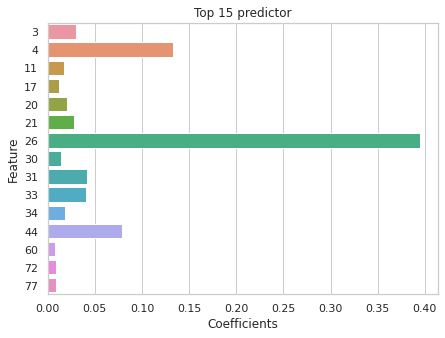

In [121]:
#printing feature importance
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":final_dt.tree_.compute_feature_importances(normalize=True)})
coefficients=coefficients.iloc[coefficients['Coefficients'].abs().argsort()]
coefficients=coefficients.tail(15)
plt.figure(figsize=(7,5))
plt.title("Top 15 predictor")
sns.barplot(coefficients['Coefficients'],coefficients['Feature'],orient = 'h')

In [122]:
pd.DataFrame(performance_dict)

model#1  \
0  Logistic regression without sampling and with PCA   
1                                           0.923346   
2                                           0.651163   
3                                           0.266667   
4                                           0.378378   

                                     model#2  \
0  Logistic regression with sampling and PCA   
1                                   0.833861   
2                                   0.323617   
3                                   0.824762   
4                                   0.464842   

                                             model#3  \
0  Decision Tree with sampling and PCA without gr...   
1                                            0.83836   
2                                           0.315964   
3                                           0.727619   
4                                             0.4406   

                                             model#4  \
0  Decision Tree with sampling and PCA with grids...   
1                                           0.832028   
2                                           0.299252   
3                                           0.685714   
4                                           0.416667   

                                             model#5  \
0  Random Forest with sampling and PCA without gr...   
1                                           0.922846   
2                                           0.557836   
3                                           0.569524   
4                                           0.563619   

                                             model#6  \
0  Random Forest with sampling and PCA with grids...   
1                                           0.890352   
2                                           0.425365   
3                                           0.721905   
4                                           0.535311   

                                   model#7  \
0  SVM with sampling and PCA linear kernel   
1                                 0.844859   
2                                 0.339905   
3                                 0.820952   
4                                 0.480759   

                                       model#8  \
0  SVM with sampling and PCA polynomial kernel   
1                                     0.892518   
2                                      0.43135   
3                                     0.718095   
4                                     0.538956   

                                   model#9                        model#10  \
0  SVM with sampling and PCA radial kernel  XGBoost with sampling and PCA    
1                                 0.895351                        0.908682   
2                                 0.440873                        0.483405   
3                                 0.731429                        0.638095   
4                                 0.550143                        0.550082   

                                       model#11  \
0  Logistic regression without PCA simple model   
1                                      0.860523   
2                                      0.366667   
3                                      0.817143   
4                                      0.506195   

                                 model#12  \
0  Decision Tree without PCA simple model   
1                                 0.85919   
2                                0.355596   
3                                0.750476   
4                                0.482547   

                                            model#13  
0  Decision Tree without PCA simple model with gr...  
1                                           0.890518  
2                                           0.423788  
3                                           0.699048  
4                                           0.527678

 From telecom churn prediction we want to select models that are having highest recall as we dont want to miss out anyone who 
 will possibly churn. 
 From the above table we can conclude that the #Model 7 SVM Model with sampling and PCA linear Kernel and #Model 2 Logistic 
Regression with sampling and PCA make the cut and should be chosen for predicting churn in telecom

 Based on the logistic regression model we can conclude that following features
 have an impact on the customer to churn

- Feature 1 : Total incoming minutes of usage in month 8 has a negative correlation
             This means that if total incoming minutes in month 8 are high 
             the user is not likely to churn
- Feature 2 : Local incoming minutes of usage in month 8 has a strong positive
             correlation with probability to churn. This means that more the 
             local incoming minutes of usage the more the user is likely to churn
- Feature 3:  Std outgoing minutes of usage in month 8 has a strong positive 
             correlation with probability to churn. This means that more the
             std outgoing minutes of usage more is the probability that user
            will churn
- Feature 4:  Total outgoing minutes of usage in month 8 has a strong negative correlation
             This means that more the total number of outgoing minutes lesser 
             is the possibility that the user will churn
- Feature 5:  Local outgoing minutes of usage in month 8 has a positive correlation
             meaning more that local outgoing minutes in month 8 more the possibility
             of churn

 The recommendations to business will be to monitor the above variables for 
striking differences to predict the churn and take corrective action in month 
 8 itself.